In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline


In [2]:
fifa = pd.read_csv("data.csv", index_col = 0)
df= fifa
df.head(5)

Nationality  Overall  Potential                 Club    Value   Wage  \
0   Argentina       94         94         FC Barcelona  €110.5M  €565K   
1    Portugal       94         94             Juventus     €77M  €405K   
2      Brazil       92         93  Paris Saint-Germain  €118.5M  €290K   
3       Spain       91         93    Manchester United     €72M  €260K   
4     Belgium       91         92      Manchester City    €102M  €355K   

   Special  International Reputation  Skill Moves Position  ...  LongShots  \
0     2202                       5.0          4.0       RF  ...       94.0   
1     2228                       5.0          5.0       ST  ...       93.0   
2     2143                       5.0          5.0       LW  ...       82.0   
3     1471                       4.0          1.0       GK  ...       12.0   
4     2281                       4.0          4.0      RCM  ...       91.0   

   Aggression  Interceptions  Positioning  Vision  Penalties  Composure  \
0        48.0           22.0         94.0    94.0       75.0       96.0   
1        63.0           29.0         95.0    82.0       85.0       95.0   
2        56.0           36.0         89.0    87.0       81.0       94.0   
3        38.0           30.0         12.0    68.0       40.0       68.0   
4        76.0           61.0         87.0    94.0       79.0       88.0   

   Marking  StandingTackle  SlidingTackle  
0     33.0            28.0           26.0  
1     28.0            31.0           23.0  
2     27.0            24.0           33.0  
3     15.0            21.0           13.0  
4     68.0            58.0           51.0  

[5 rows x 37 columns]

In [3]:
df.shape

(18207, 37)

## Preprosessing.

In [4]:
df.dropna(how= 'any', inplace= True)

In [5]:
df.Wage = df['Wage'].str.replace('€', '')
df.Value = df['Value'].str.replace('€', '')
df

Nationality  Overall  Potential                 Club   Value  Wage  \
0       Argentina       94         94         FC Barcelona  110.5M  565K   
1        Portugal       94         94             Juventus     77M  405K   
2          Brazil       92         93  Paris Saint-Germain  118.5M  290K   
3           Spain       91         93    Manchester United     72M  260K   
4         Belgium       91         92      Manchester City    102M  355K   
...           ...      ...        ...                  ...     ...   ...   
18202     England       47         65      Crewe Alexandra     60K    1K   
18203      Sweden       47         63       Trelleborgs FF     60K    1K   
18204     England       47         67     Cambridge United     60K    1K   
18205     England       47         66      Tranmere Rovers     60K    1K   
18206     England       46         66      Tranmere Rovers     60K    1K   

       Special  International Reputation  Skill Moves Position  ...  \
0         2202                       5.0          4.0       RF  ...   
1         2228                       5.0          5.0       ST  ...   
2         2143                       5.0          5.0       LW  ...   
3         1471                       4.0          1.0       GK  ...   
4         2281                       4.0          4.0      RCM  ...   
...        ...                       ...          ...      ...  ...   
18202     1307                       1.0          2.0       CM  ...   
18203     1098                       1.0          2.0       ST  ...   
18204     1189                       1.0          2.0       ST  ...   
18205     1228                       1.0          2.0       RW  ...   
18206     1321                       1.0          2.0       CM  ...   

       LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0           94.0        48.0           22.0         94.0    94.0       75.0   
1           93.0        63.0           29.0         95.0    82.0       85.0   
2           82.0        56.0           36.0         89.0    87.0       81.0   
3           12.0        38.0           30.0         12.0    68.0       40.0   
4           91.0        76.0           61.0         87.0    94.0       79.0   
...          ...         ...            ...          ...     ...        ...   
18202       38.0        46.0           46.0         39.0    52.0       43.0   
18203       42.0        47.0           16.0         46.0    33.0       43.0   
18204       45.0        32.0           15.0         48.0    43.0       55.0   
18205       34.0        33.0           22.0         44.0    47.0       50.0   
18206       32.0        56.0           42.0         34.0    49.0       33.0   

       Composure  Marking  StandingTackle  SlidingTackle  
0           96.0     33.0            28.0           26.0  
1           95.0     28.0            31.0           23.0  
2           94.0     27.0            24.0           33.0  
3           68.0     15.0            21.0           13.0  
4           88.0     68.0            58.0           51.0  
...          ...      ...             ...            ...  
18202       45.0     40.0            48.0           47.0  
18203       42.0     22.0            15.0           19.0  
18204       41.0     32.0            13.0           11.0  
18205       46.0     20.0            25.0           27.0  
18206       43.0     40.0            43.0           50.0  

[17918 rows x 37 columns]

In [6]:
df.Value = (df.Value.replace(r'[KM]+', '', regex=True).astype(float) *  df.Value.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))
df.Wage = (df.Wage.replace(r'[KM]+', '', regex=True).astype(float) *  df.Wage.str.extract(r'[\d\.]+([KM]+)', expand=False)
           .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))
df

Nationality  Overall  Potential                 Club        Value  \
0       Argentina       94         94         FC Barcelona  110500000.0   
1        Portugal       94         94             Juventus   77000000.0   
2          Brazil       92         93  Paris Saint-Germain  118500000.0   
3           Spain       91         93    Manchester United   72000000.0   
4         Belgium       91         92      Manchester City  102000000.0   
...           ...      ...        ...                  ...          ...   
18202     England       47         65      Crewe Alexandra      60000.0   
18203      Sweden       47         63       Trelleborgs FF      60000.0   
18204     England       47         67     Cambridge United      60000.0   
18205     England       47         66      Tranmere Rovers      60000.0   
18206     England       46         66      Tranmere Rovers      60000.0   

           Wage  Special  International Reputation  Skill Moves Position  ...  \
0      565000.0     2202                       5.0          4.0       RF  ...   
1      405000.0     2228                       5.0          5.0       ST  ...   
2      290000.0     2143                       5.0          5.0       LW  ...   
3      260000.0     1471                       4.0          1.0       GK  ...   
4      355000.0     2281                       4.0          4.0      RCM  ...   
...         ...      ...                       ...          ...      ...  ...   
18202    1000.0     1307                       1.0          2.0       CM  ...   
18203    1000.0     1098                       1.0          2.0       ST  ...   
18204    1000.0     1189                       1.0          2.0       ST  ...   
18205    1000.0     1228                       1.0          2.0       RW  ...   
18206    1000.0     1321                       1.0          2.0       CM  ...   

       LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0           94.0        48.0           22.0         94.0    94.0       75.0   
1           93.0        63.0           29.0         95.0    82.0       85.0   
2           82.0        56.0           36.0         89.0    87.0       81.0   
3           12.0        38.0           30.0         12.0    68.0       40.0   
4           91.0        76.0           61.0         87.0    94.0       79.0   
...          ...         ...            ...          ...     ...        ...   
18202       38.0        46.0           46.0         39.0    52.0       43.0   
18203       42.0        47.0           16.0         46.0    33.0       43.0   
18204       45.0        32.0           15.0         48.0    43.0       55.0   
18205       34.0        33.0           22.0         44.0    47.0       50.0   
18206       32.0        56.0           42.0         34.0    49.0       33.0   

       Composure  Marking  StandingTackle  SlidingTackle  
0           96.0     33.0            28.0           26.0  
1           95.0     28.0            31.0           23.0  
2           94.0     27.0            24.0           33.0  
3           68.0     15.0            21.0           13.0  
4           88.0     68.0            58.0           51.0  
...          ...      ...             ...            ...  
18202       45.0     40.0            48.0           47.0  
18203       42.0     22.0            15.0           19.0  
18204       41.0     32.0            13.0           11.0  
18205       46.0     20.0            25.0           27.0  
18206       43.0     40.0            43.0           50.0  

[17918 rows x 37 columns]

In [7]:
print(df[df.Position == 'GK'])


      Nationality  Overall  Potential               Club       Value  \
3           Spain       91         93  Manchester United  72000000.0   
9        Slovenia       90         93    Atlético Madrid  68000000.0   
18        Germany       89         92       FC Barcelona  58000000.0   
19        Belgium       89         90        Real Madrid  53500000.0   
22        Germany       89         89  FC Bayern München  38000000.0   
...           ...      ...        ...                ...         ...   
18178      Sweden       48         65         Dalkurd FF     50000.0   
18180    Scotland       48         58   St. Johnstone FC     40000.0   
18183     England       48         48   Cambridge United         0.0   
18194       Italy       47         65              Lecce     50000.0   
18198     England       47         70      Burton Albion     60000.0   

           Wage  Special  International Reputation  Skill Moves Position  ...  \
3      260000.0     1471                       4.0    

In [8]:
df.drop(df[df.Position == 'GK'].index, axis = 0, inplace = True)

In [9]:
df.reset_index(drop = True)

Nationality  Overall  Potential                 Club        Value  \
0       Argentina       94         94         FC Barcelona  110500000.0   
1        Portugal       94         94             Juventus   77000000.0   
2          Brazil       92         93  Paris Saint-Germain  118500000.0   
3         Belgium       91         92      Manchester City  102000000.0   
4         Belgium       91         91              Chelsea   93000000.0   
...           ...      ...        ...                  ...          ...   
15921     England       47         65      Crewe Alexandra      60000.0   
15922      Sweden       47         63       Trelleborgs FF      60000.0   
15923     England       47         67     Cambridge United      60000.0   
15924     England       47         66      Tranmere Rovers      60000.0   
15925     England       46         66      Tranmere Rovers      60000.0   

           Wage  Special  International Reputation  Skill Moves Position  ...  \
0      565000.0     2202                       5.0          4.0       RF  ...   
1      405000.0     2228                       5.0          5.0       ST  ...   
2      290000.0     2143                       5.0          5.0       LW  ...   
3      355000.0     2281                       4.0          4.0      RCM  ...   
4      340000.0     2142                       4.0          4.0       LF  ...   
...         ...      ...                       ...          ...      ...  ...   
15921    1000.0     1307                       1.0          2.0       CM  ...   
15922    1000.0     1098                       1.0          2.0       ST  ...   
15923    1000.0     1189                       1.0          2.0       ST  ...   
15924    1000.0     1228                       1.0          2.0       RW  ...   
15925    1000.0     1321                       1.0          2.0       CM  ...   

       LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0           94.0        48.0           22.0         94.0    94.0       75.0   
1           93.0        63.0           29.0         95.0    82.0       85.0   
2           82.0        56.0           36.0         89.0    87.0       81.0   
3           91.0        76.0           61.0         87.0    94.0       79.0   
4           80.0        54.0           41.0         87.0    89.0       86.0   
...          ...         ...            ...          ...     ...        ...   
15921       38.0        46.0           46.0         39.0    52.0       43.0   
15922       42.0        47.0           16.0         46.0    33.0       43.0   
15923       45.0        32.0           15.0         48.0    43.0       55.0   
15924       34.0        33.0           22.0         44.0    47.0       50.0   
15925       32.0        56.0           42.0         34.0    49.0       33.0   

       Composure  Marking  StandingTackle  SlidingTackle  
0           96.0     33.0            28.0           26.0  
1           95.0     28.0            31.0           23.0  
2           94.0     27.0            24.0           33.0  
3           88.0     68.0            58.0           51.0  
4           91.0     34.0            27.0           22.0  
...          ...      ...             ...            ...  
15921       45.0     40.0            48.0           47.0  
15922       42.0     22.0            15.0           19.0  
15923       41.0     32.0            13.0           11.0  
15924       46.0     20.0            25.0           27.0  
15925       43.0     40.0            43.0           50.0  

[15926 rows x 37 columns]

In [10]:
df.describe()

Overall     Potential         Value           Wage       Special  \
count  15926.000000  15926.000000  1.592600e+04   15926.000000  15926.000000   
mean      66.446189     71.521035  2.553262e+06   10254.866256   1667.224601   
std        6.809244      6.083926  5.739799e+06   22692.769542    196.710480   
min       46.000000     48.000000  0.000000e+00    1000.000000   1000.000000   
25%       62.000000     67.000000  3.500000e+05    1000.000000   1526.000000   
50%       66.000000     71.000000  7.500000e+05    3000.000000   1670.000000   
75%       71.000000     75.000000  2.200000e+06   10000.000000   1806.000000   
max       94.000000     95.000000  1.185000e+08  565000.000000   2346.000000   

       International Reputation   Skill Moves      Crossing     Finishing  \
count              15926.000000  15926.000000  15926.000000  15926.000000   
mean                   1.116037      2.533342     54.189501     49.781301   
std                    0.397762      0.618186     14.130706     16.360582   
min                    1.000000      2.000000     11.000000     10.000000   
25%                    1.000000      2.000000     44.000000     36.000000   
50%                    1.000000      2.000000     56.000000     52.000000   
75%                    1.000000      3.000000     65.000000     63.000000   
max                    5.000000      5.000000     93.000000     95.000000   

       HeadingAccuracy  ...     LongShots    Aggression  Interceptions  \
count     15926.000000  ...  15926.000000  15926.000000   15926.000000   
mean         57.040186  ...     51.446126     59.575411      50.401168   
std          11.614840  ...     15.718376     14.432944      18.797738   
min          15.000000  ...     11.000000     13.000000      10.000000   
25%          49.000000  ...     40.000000     50.000000      34.000000   
50%          58.000000  ...     54.000000     61.000000      56.000000   
75%          65.000000  ...     64.000000     70.000000      65.000000   
max          94.000000  ...     94.000000     95.000000      92.000000   

        Positioning        Vision     Penalties    Composure       Marking  \
count  15926.000000  15926.000000  15926.000000  15926.00000  15926.000000   
mean      54.844405     55.494726     52.118234     60.34654     51.273703   
std       14.665434     12.897478     12.501841     10.14202     17.198926   
min       11.000000     12.000000     12.000000     29.00000     10.000000   
25%       46.000000     47.000000     42.000000     53.00000     37.000000   
50%       57.000000     57.000000     52.000000     61.00000     56.000000   
75%       65.000000     65.000000     61.000000     68.00000     65.000000   
max       95.000000     94.000000     92.000000     96.00000     94.000000   

       StandingTackle  SlidingTackle  
count    15926.000000   15926.000000  
mean        51.883021      49.593118  
std         19.161875      19.162508  
min         10.000000      10.000000  
25%         35.000000      32.000000  
50%         59.000000      56.000000  
75%         67.000000      65.000000  
max         93.000000      91.000000  

[8 rows x 34 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15926 entries, 0 to 18206
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nationality               15926 non-null  object 
 1   Overall                   15926 non-null  int64  
 2   Potential                 15926 non-null  int64  
 3   Club                      15926 non-null  object 
 4   Value                     15926 non-null  float64
 5   Wage                      15926 non-null  float64
 6   Special                   15926 non-null  int64  
 7   International Reputation  15926 non-null  float64
 8   Skill Moves               15926 non-null  float64
 9   Position                  15926 non-null  object 
 10  Crossing                  15926 non-null  float64
 11  Finishing                 15926 non-null  float64
 12  HeadingAccuracy           15926 non-null  float64
 13  ShortPassing              15926 non-null  float64
 14  Volley

In [12]:
scaler = MinMaxScaler()
print(scaler.fit(df[['Wage', 'Value']]))
df[['Wage', 'Value']] = scaler.transform(df[['Wage', 'Value']])
df

MinMaxScaler(copy=True, feature_range=(0, 1))


Nationality  Overall  Potential                 Club     Value  \
0       Argentina       94         94         FC Barcelona  0.932489   
1        Portugal       94         94             Juventus  0.649789   
2          Brazil       92         93  Paris Saint-Germain  1.000000   
4         Belgium       91         92      Manchester City  0.860759   
5         Belgium       91         91              Chelsea  0.784810   
...           ...      ...        ...                  ...       ...   
18202     England       47         65      Crewe Alexandra  0.000506   
18203      Sweden       47         63       Trelleborgs FF  0.000506   
18204     England       47         67     Cambridge United  0.000506   
18205     England       47         66      Tranmere Rovers  0.000506   
18206     England       46         66      Tranmere Rovers  0.000506   

           Wage  Special  International Reputation  Skill Moves Position  ...  \
0      1.000000     2202                       5.0          4.0       RF  ...   
1      0.716312     2228                       5.0          5.0       ST  ...   
2      0.512411     2143                       5.0          5.0       LW  ...   
4      0.627660     2281                       4.0          4.0      RCM  ...   
5      0.601064     2142                       4.0          4.0       LF  ...   
...         ...      ...                       ...          ...      ...  ...   
18202  0.000000     1307                       1.0          2.0       CM  ...   
18203  0.000000     1098                       1.0          2.0       ST  ...   
18204  0.000000     1189                       1.0          2.0       ST  ...   
18205  0.000000     1228                       1.0          2.0       RW  ...   
18206  0.000000     1321                       1.0          2.0       CM  ...   

       LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0           94.0        48.0           22.0         94.0    94.0       75.0   
1           93.0        63.0           29.0         95.0    82.0       85.0   
2           82.0        56.0           36.0         89.0    87.0       81.0   
4           91.0        76.0           61.0         87.0    94.0       79.0   
5           80.0        54.0           41.0         87.0    89.0       86.0   
...          ...         ...            ...          ...     ...        ...   
18202       38.0        46.0           46.0         39.0    52.0       43.0   
18203       42.0        47.0           16.0         46.0    33.0       43.0   
18204       45.0        32.0           15.0         48.0    43.0       55.0   
18205       34.0        33.0           22.0         44.0    47.0       50.0   
18206       32.0        56.0           42.0         34.0    49.0       33.0   

       Composure  Marking  StandingTackle  SlidingTackle  
0           96.0     33.0            28.0           26.0  
1           95.0     28.0            31.0           23.0  
2           94.0     27.0            24.0           33.0  
4           88.0     68.0            58.0           51.0  
5           91.0     34.0            27.0           22.0  
...          ...      ...             ...            ...  
18202       45.0     40.0            48.0           47.0  
18203       42.0     22.0            15.0           19.0  
18204       41.0     32.0            13.0           11.0  
18205       46.0     20.0            25.0           27.0  
18206       43.0     40.0            43.0           50.0  

[15926 rows x 37 columns]

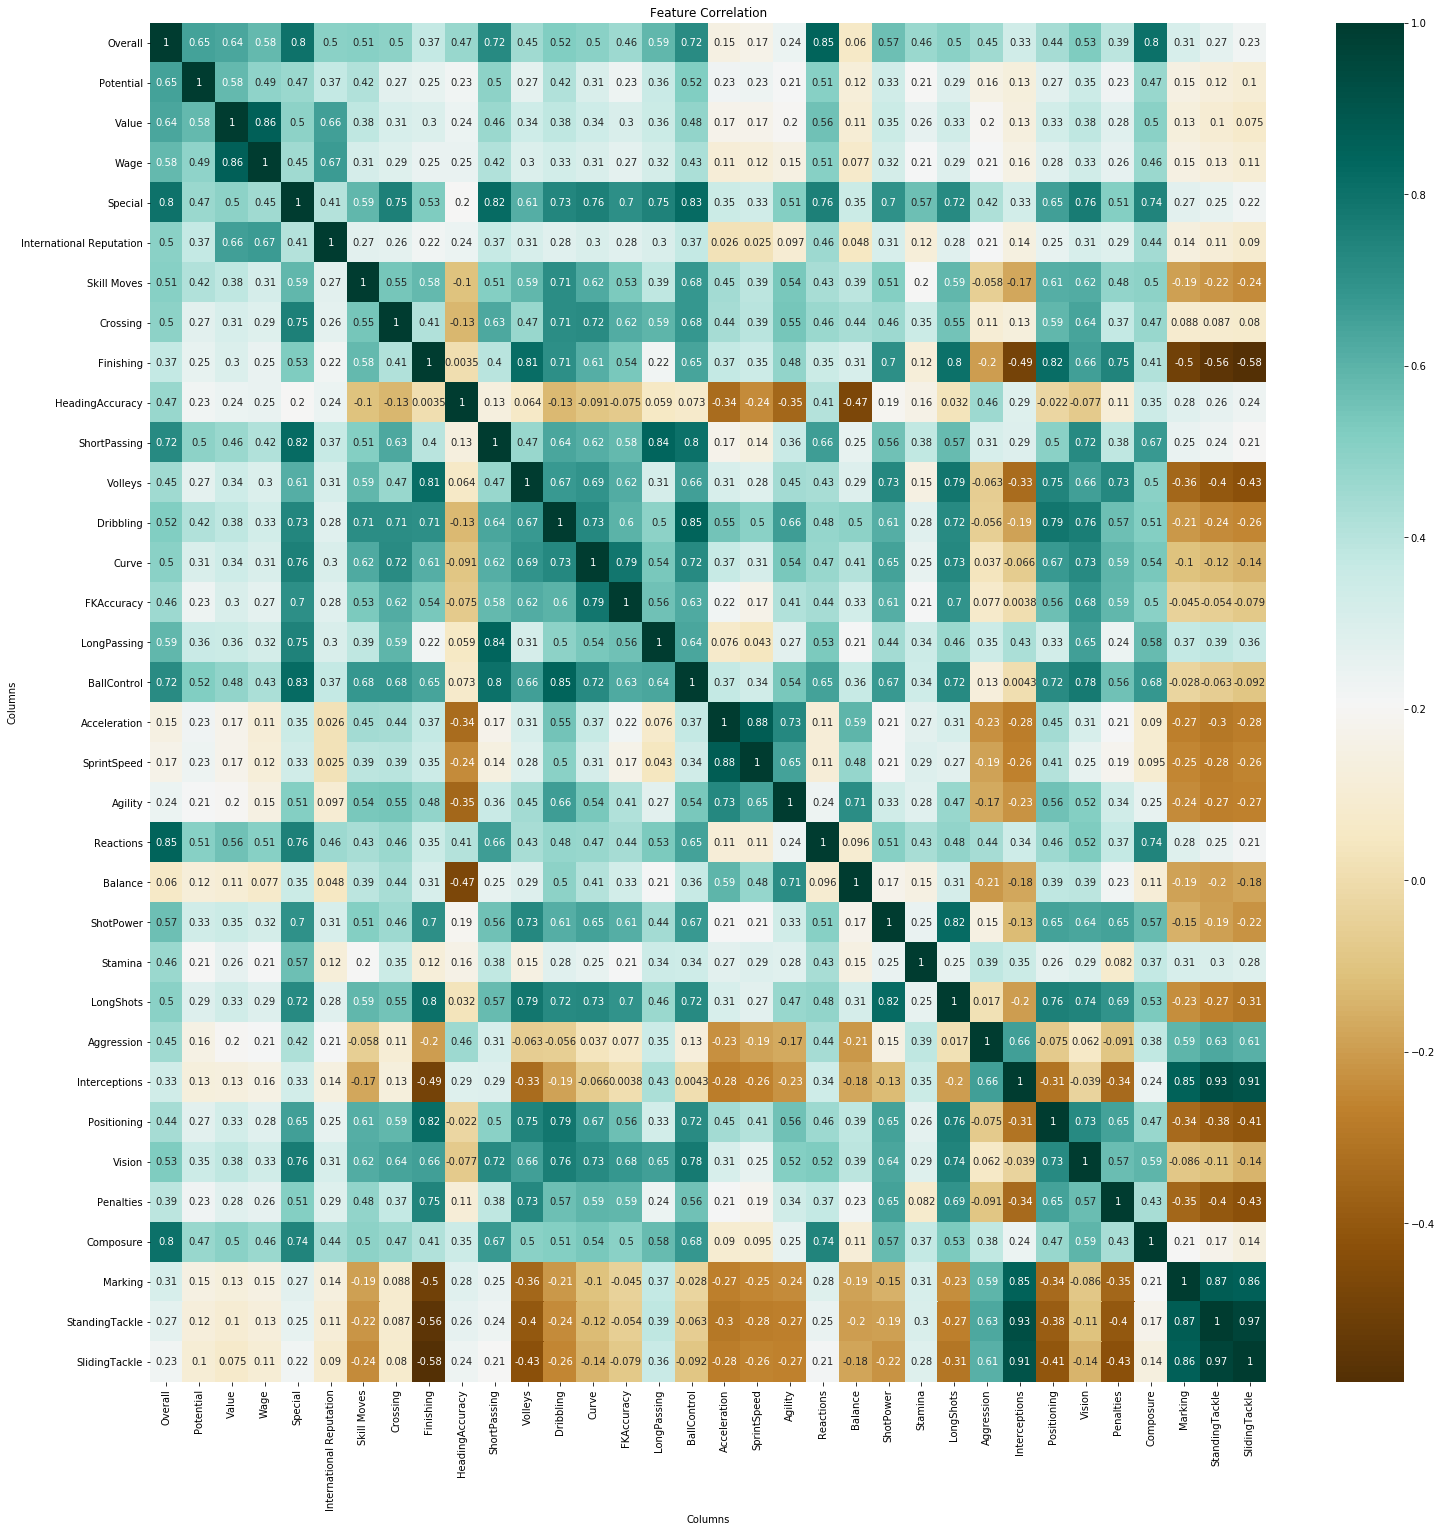

In [13]:
fig, ax = pl.subplots(figsize=(25,25)) 
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
pl.show()


In [14]:
# Counting the frequencies of the categorical attributes.

count_position=df['Position'].value_counts()
count_club=df['Club'].value_counts()
count_nation=df['Nationality'].value_counts()



In [15]:
count_position

ST     2130
CB     1754
CM     1377
LB     1305
RB     1268
RM     1114
LM     1086
CAM     948
CDM     936
RCB     652
LCB     637
LCM     389
RCM     387
LW      374
RW      365
RDM     246
LDM     239
LS      206
RS      201
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [16]:
count_nation

England        1483
Germany        1031
Spain           955
Argentina       838
France          810
               ... 
Palestine         1
Botswana          1
Puerto Rico       1
Guam              1
Ethiopia          1
Name: Nationality, Length: 162, dtype: int64

In [17]:
count_club

West Ham United        30
TSG 1899 Hoffenheim    30
Arsenal                30
Atlético Madrid        30
Borussia Dortmund      30
                       ..
Atlético Mineiro       18
Chapecoense            18
Limerick FC            17
Sligo Rovers           17
Derry City             16
Name: Club, Length: 651, dtype: int64

## Visualizing Catrgotical Variable Frequencies

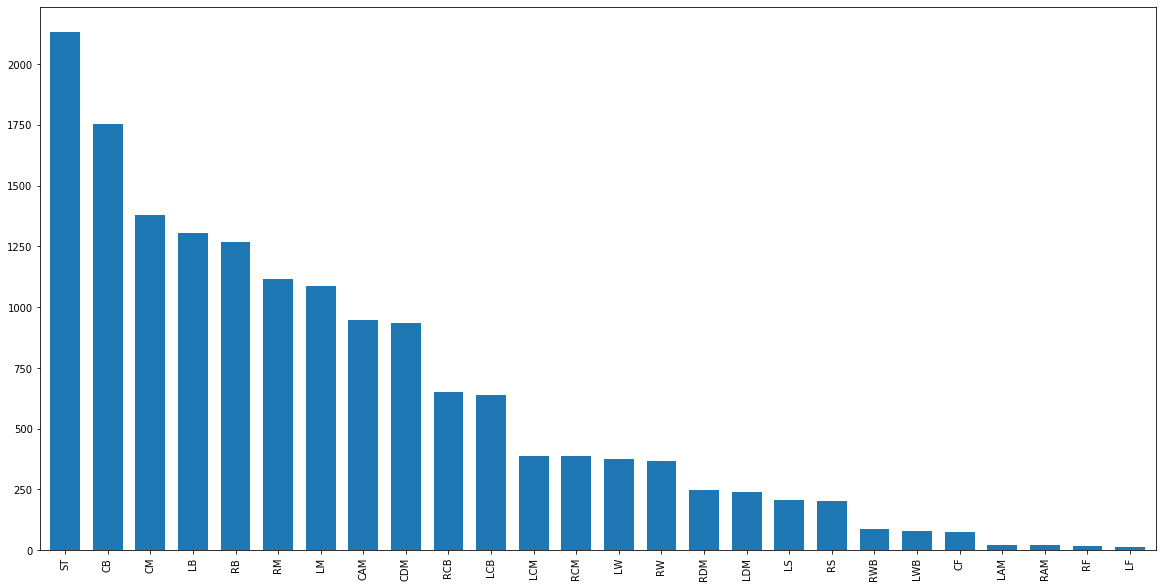

In [18]:

count_position.plot.bar(figsize = (20,10),width = 0.7)


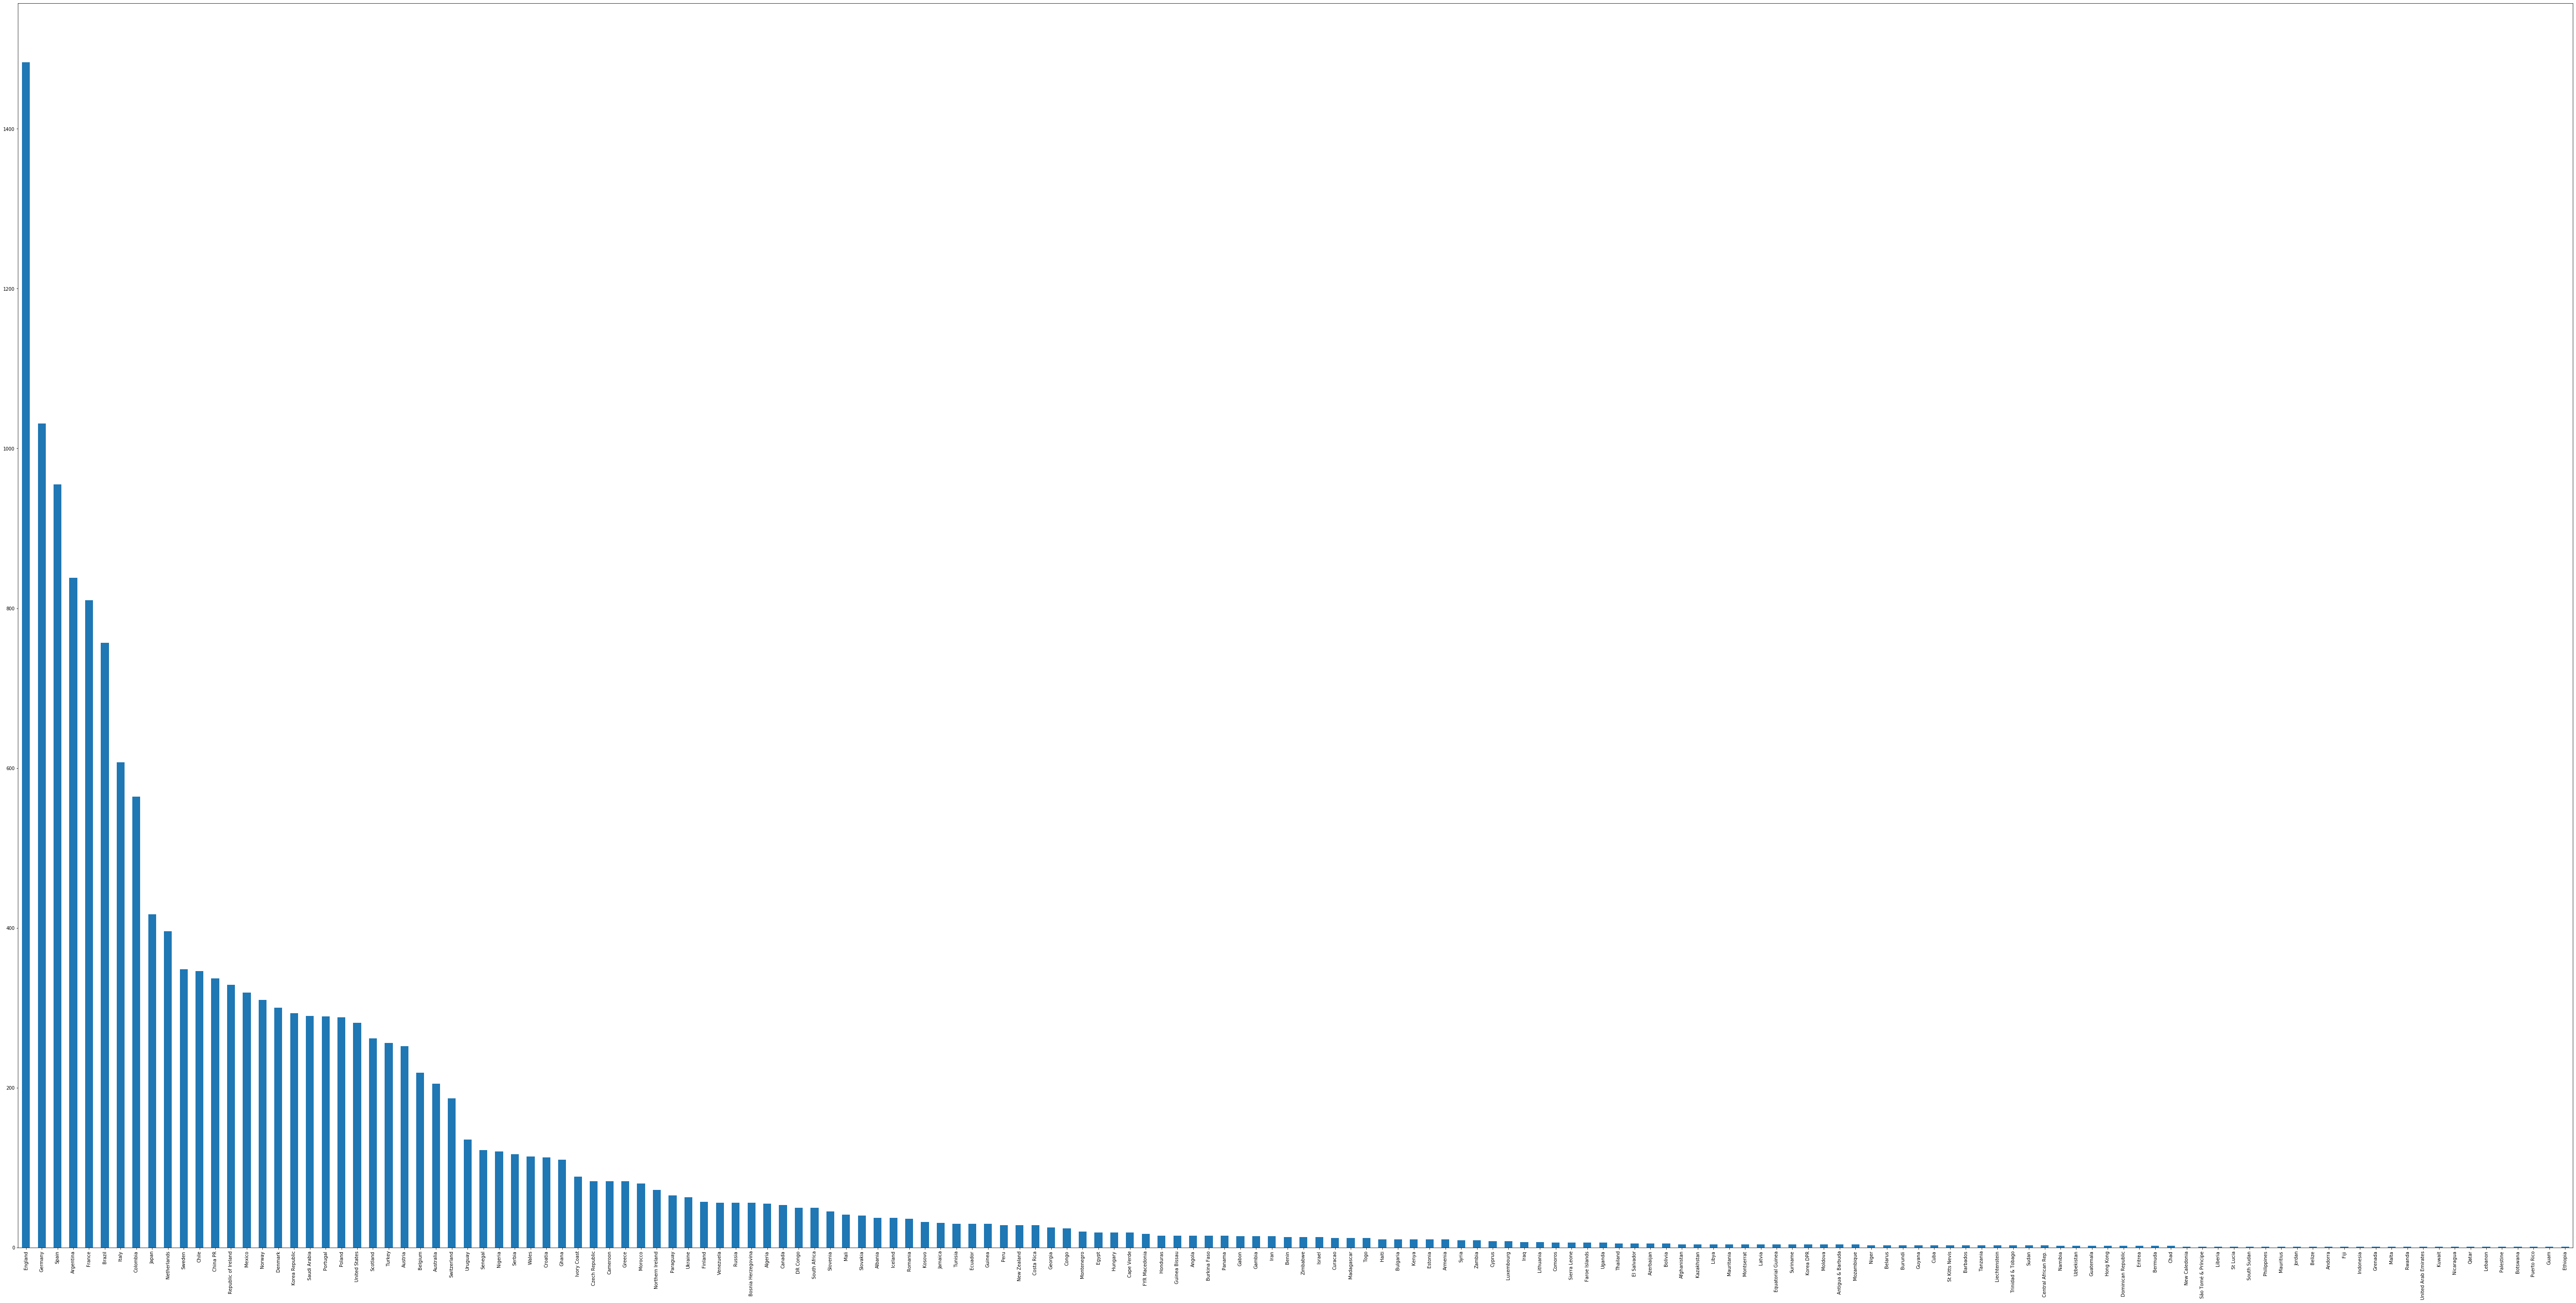

In [19]:
count_nation.plot.bar(figsize=(100,50))

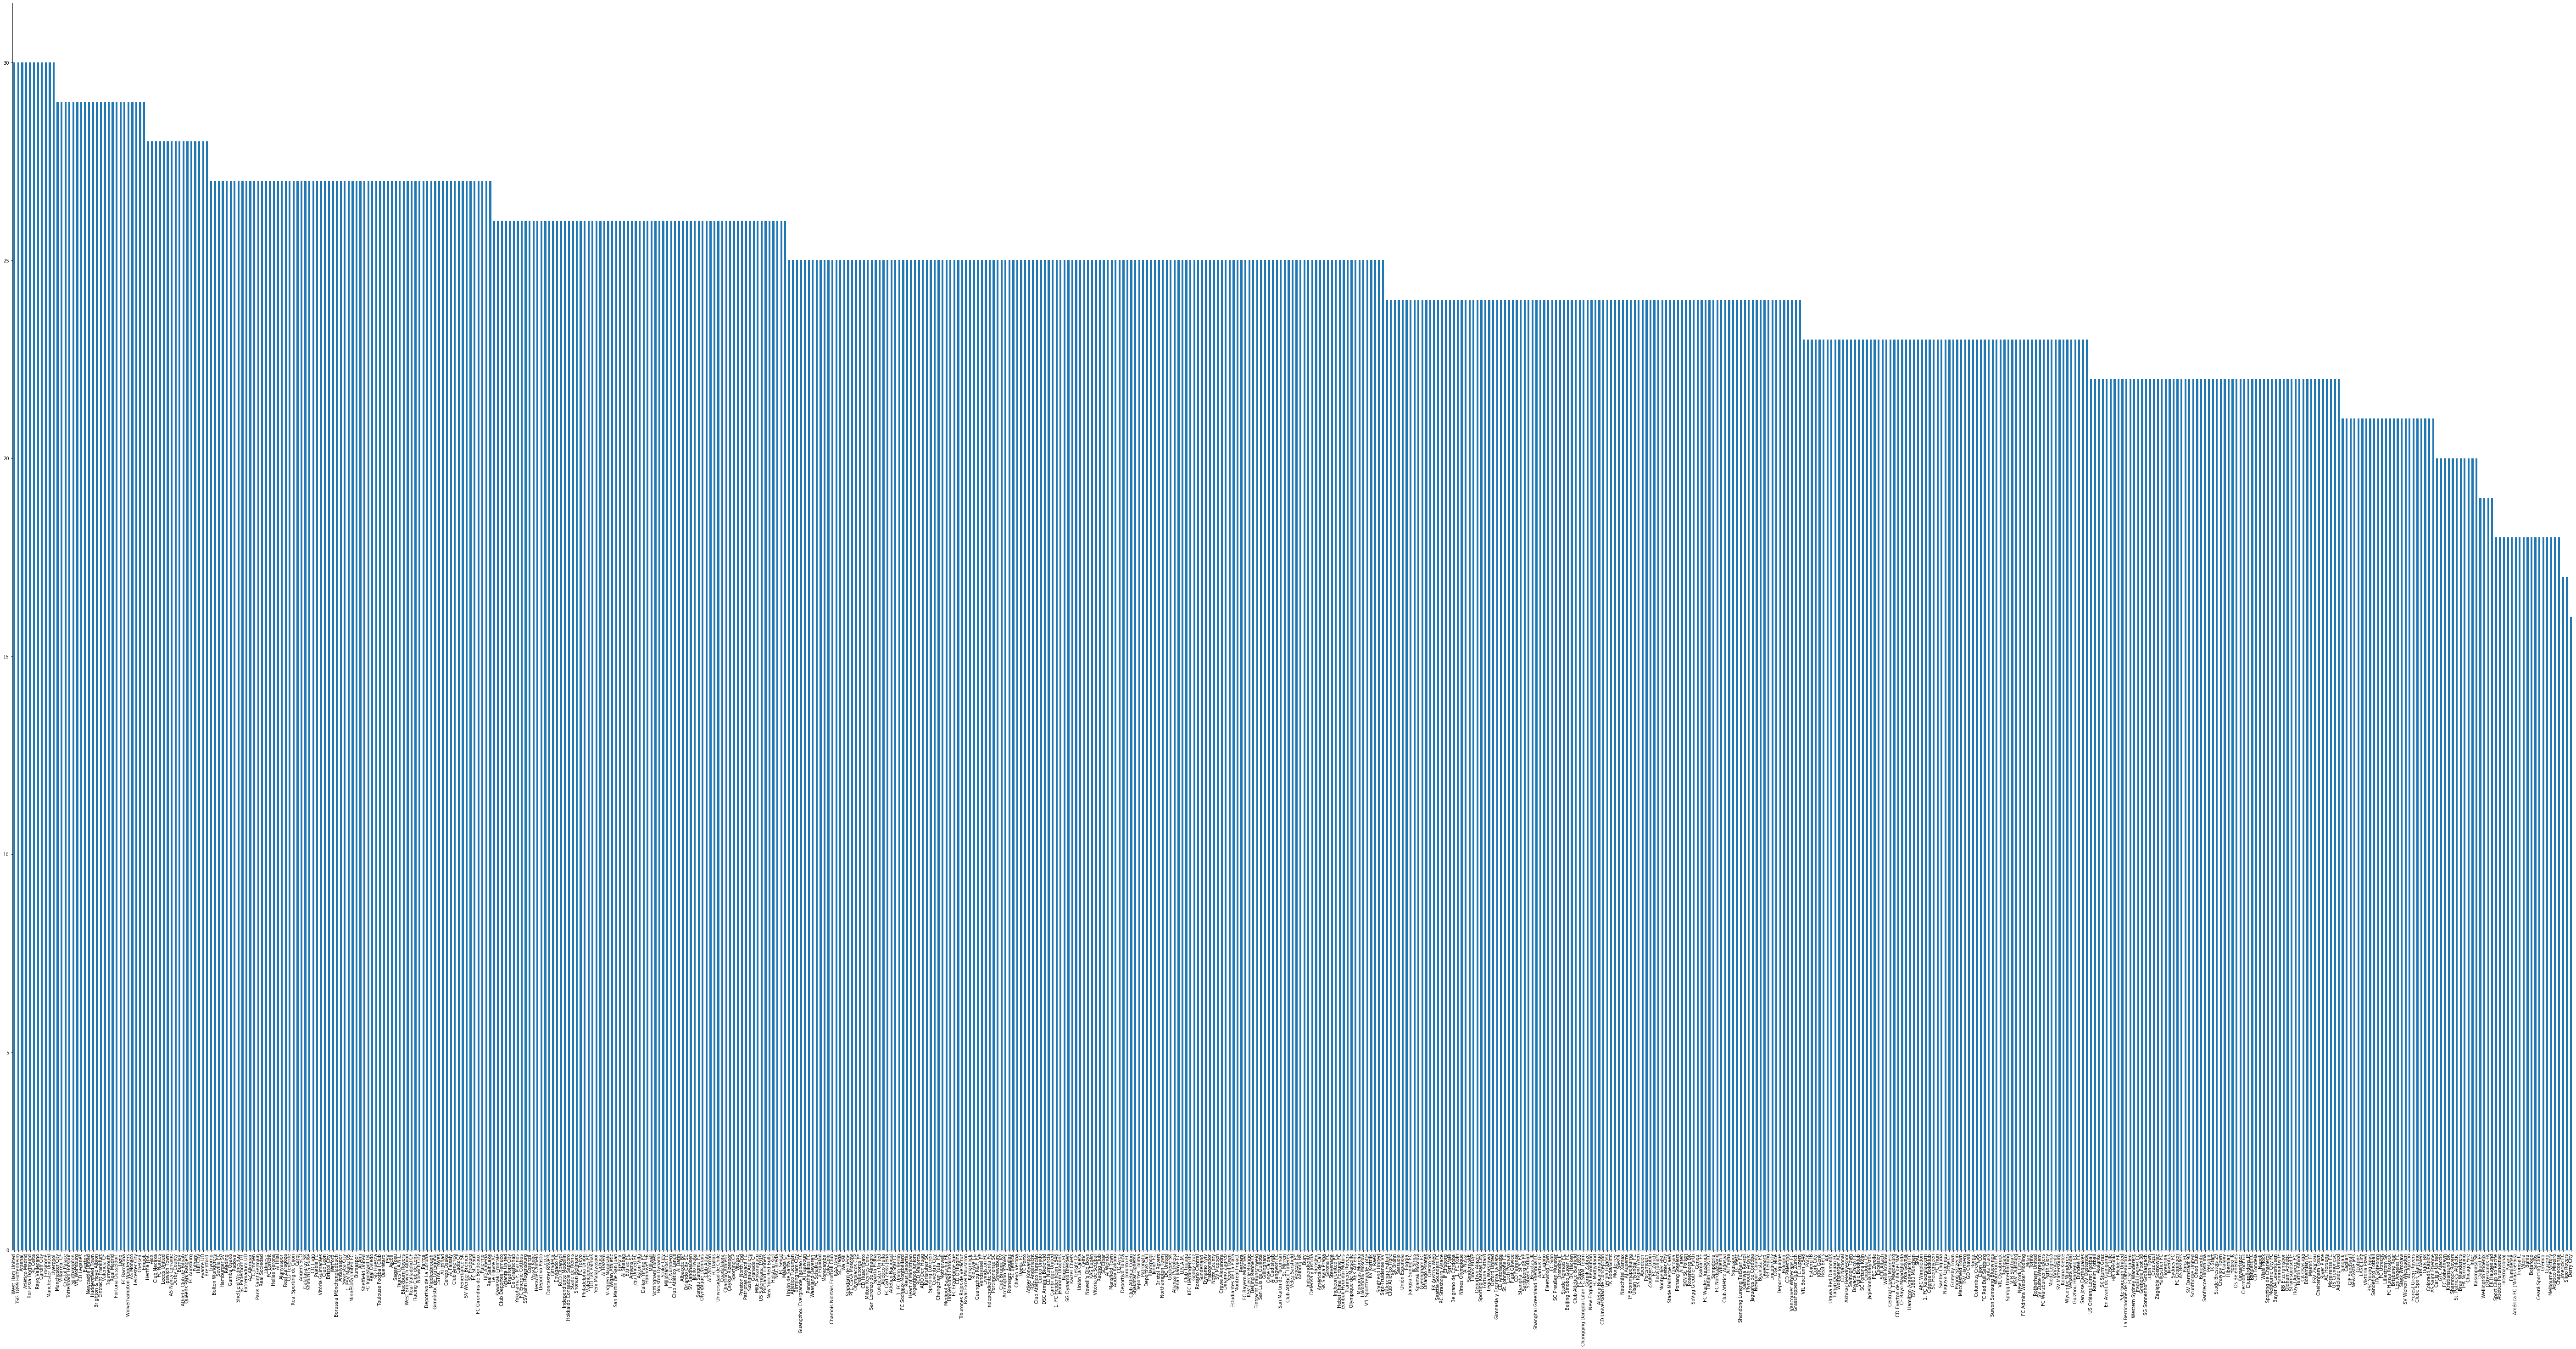

In [20]:
count_club.plot.bar(figsize= (100,50))

##  Comparing Wage and Categorical Variable

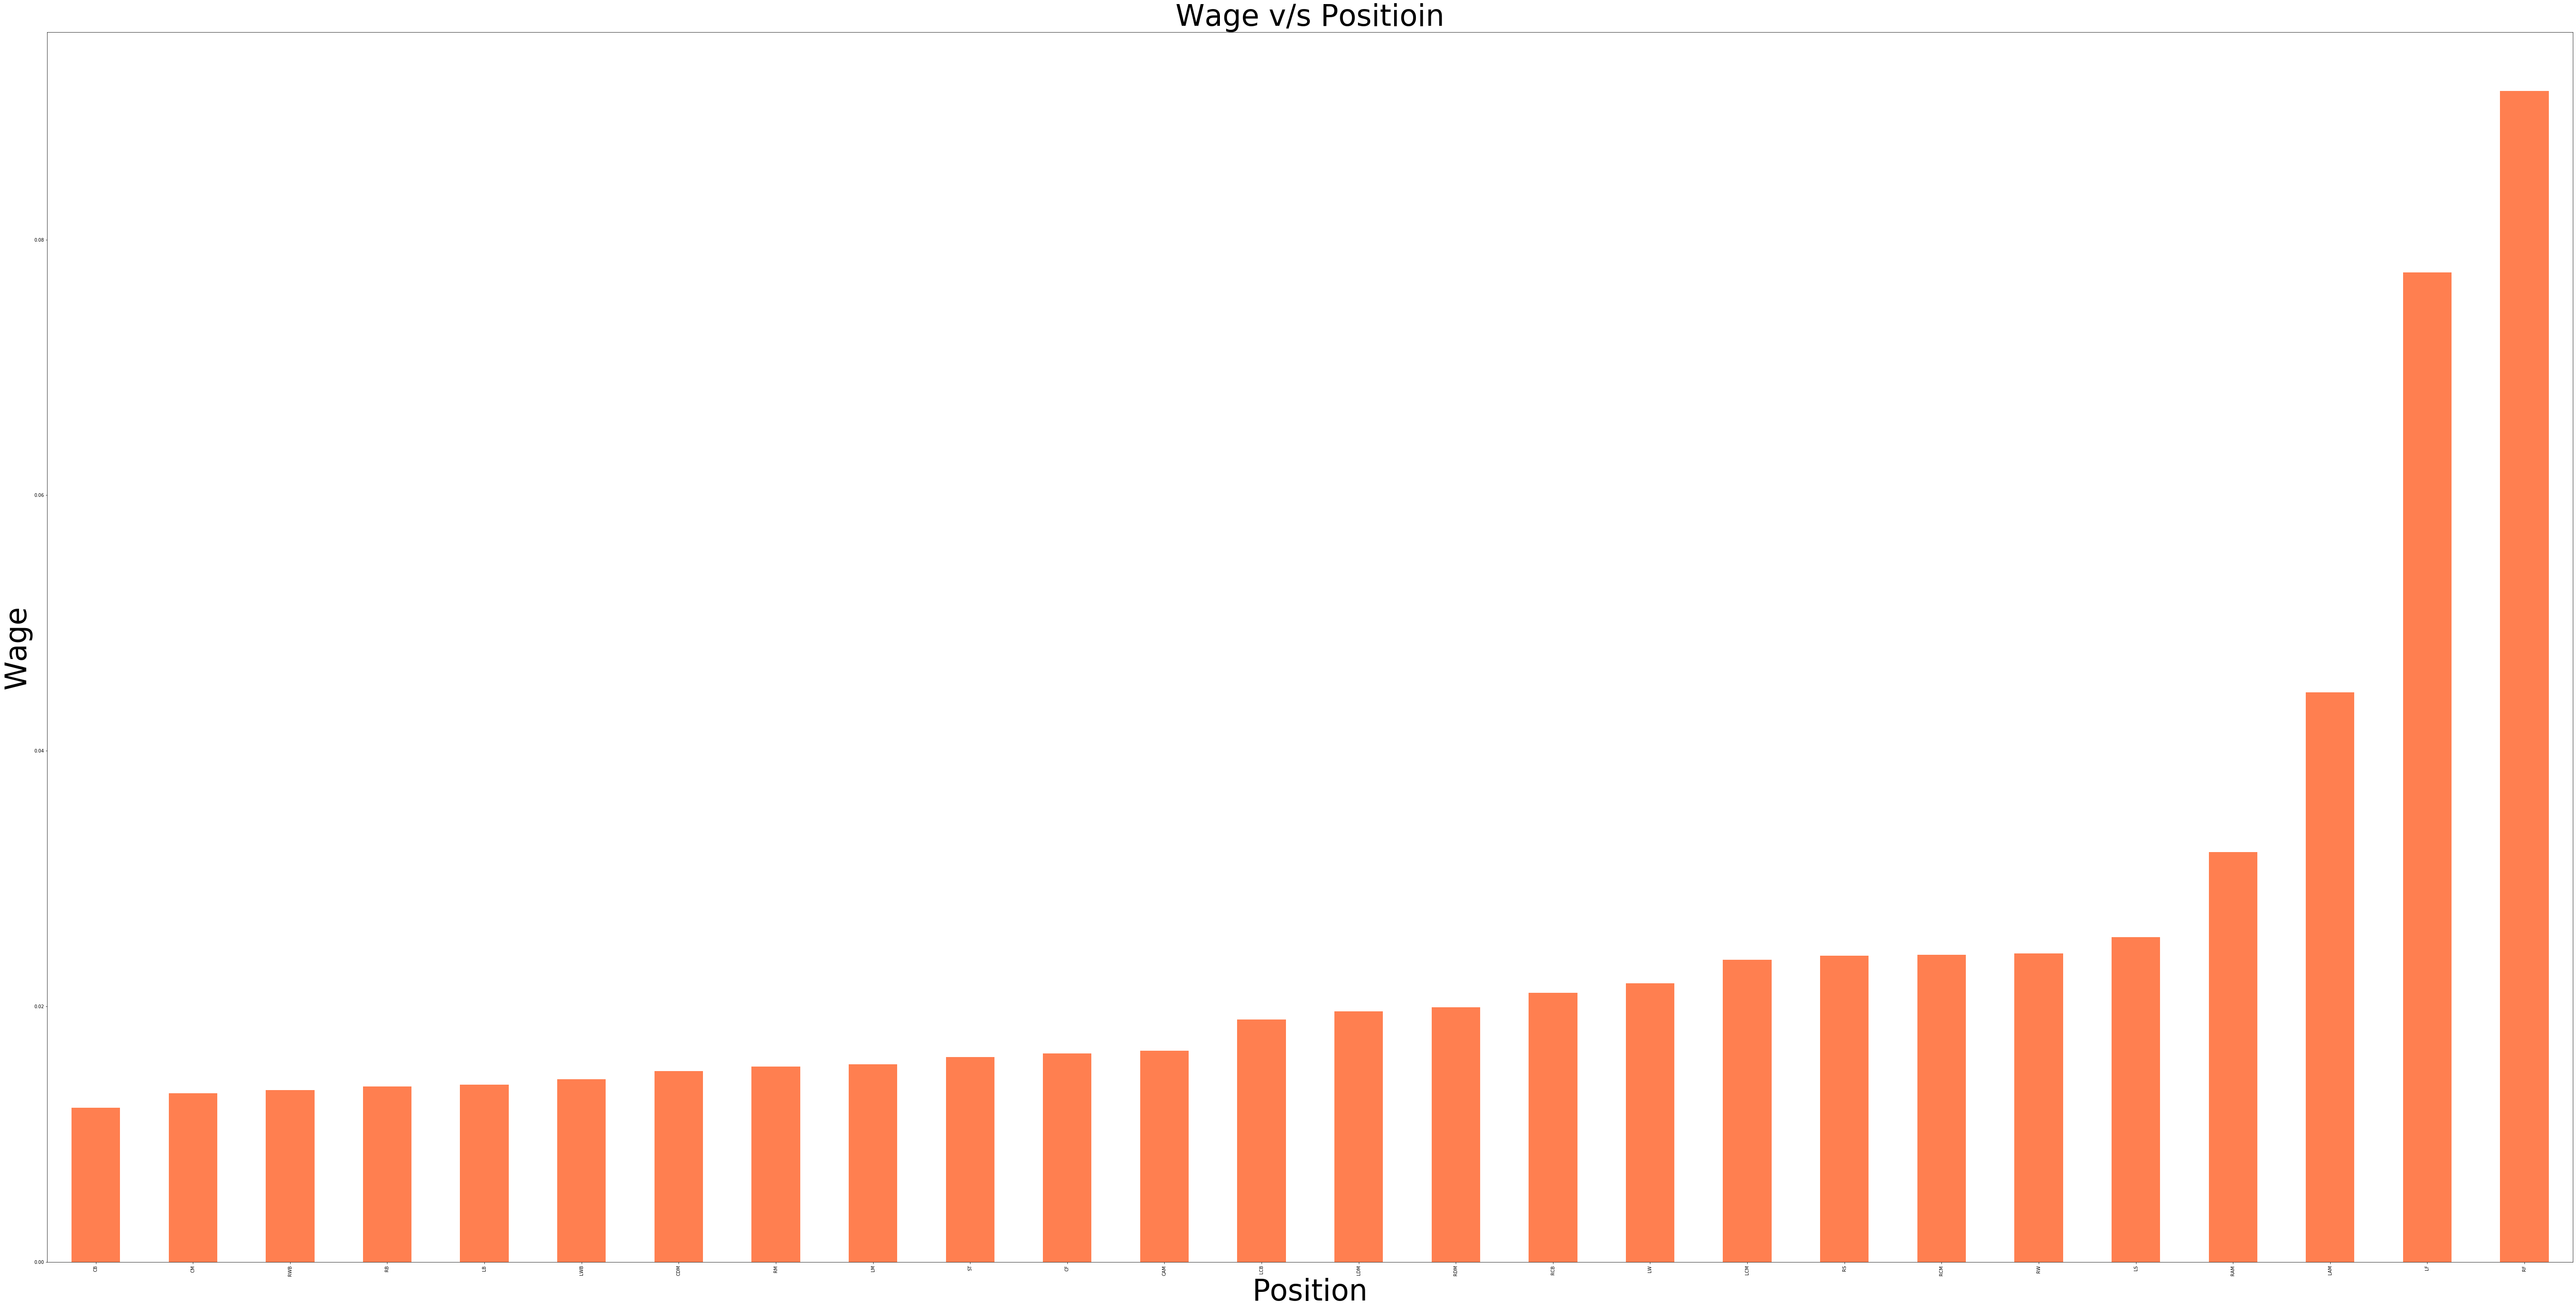

In [21]:
fig = pl.figure(figsize=(100, 50))
df.groupby('Position')['Wage'].mean().sort_values().plot(kind='bar', color='coral')
pl.title('Wage v/s Positioin', fontsize= 65)
pl.xlabel("Position", fontsize= 65)
pl.ylabel('Wage', fontsize= 65)
pl.show()

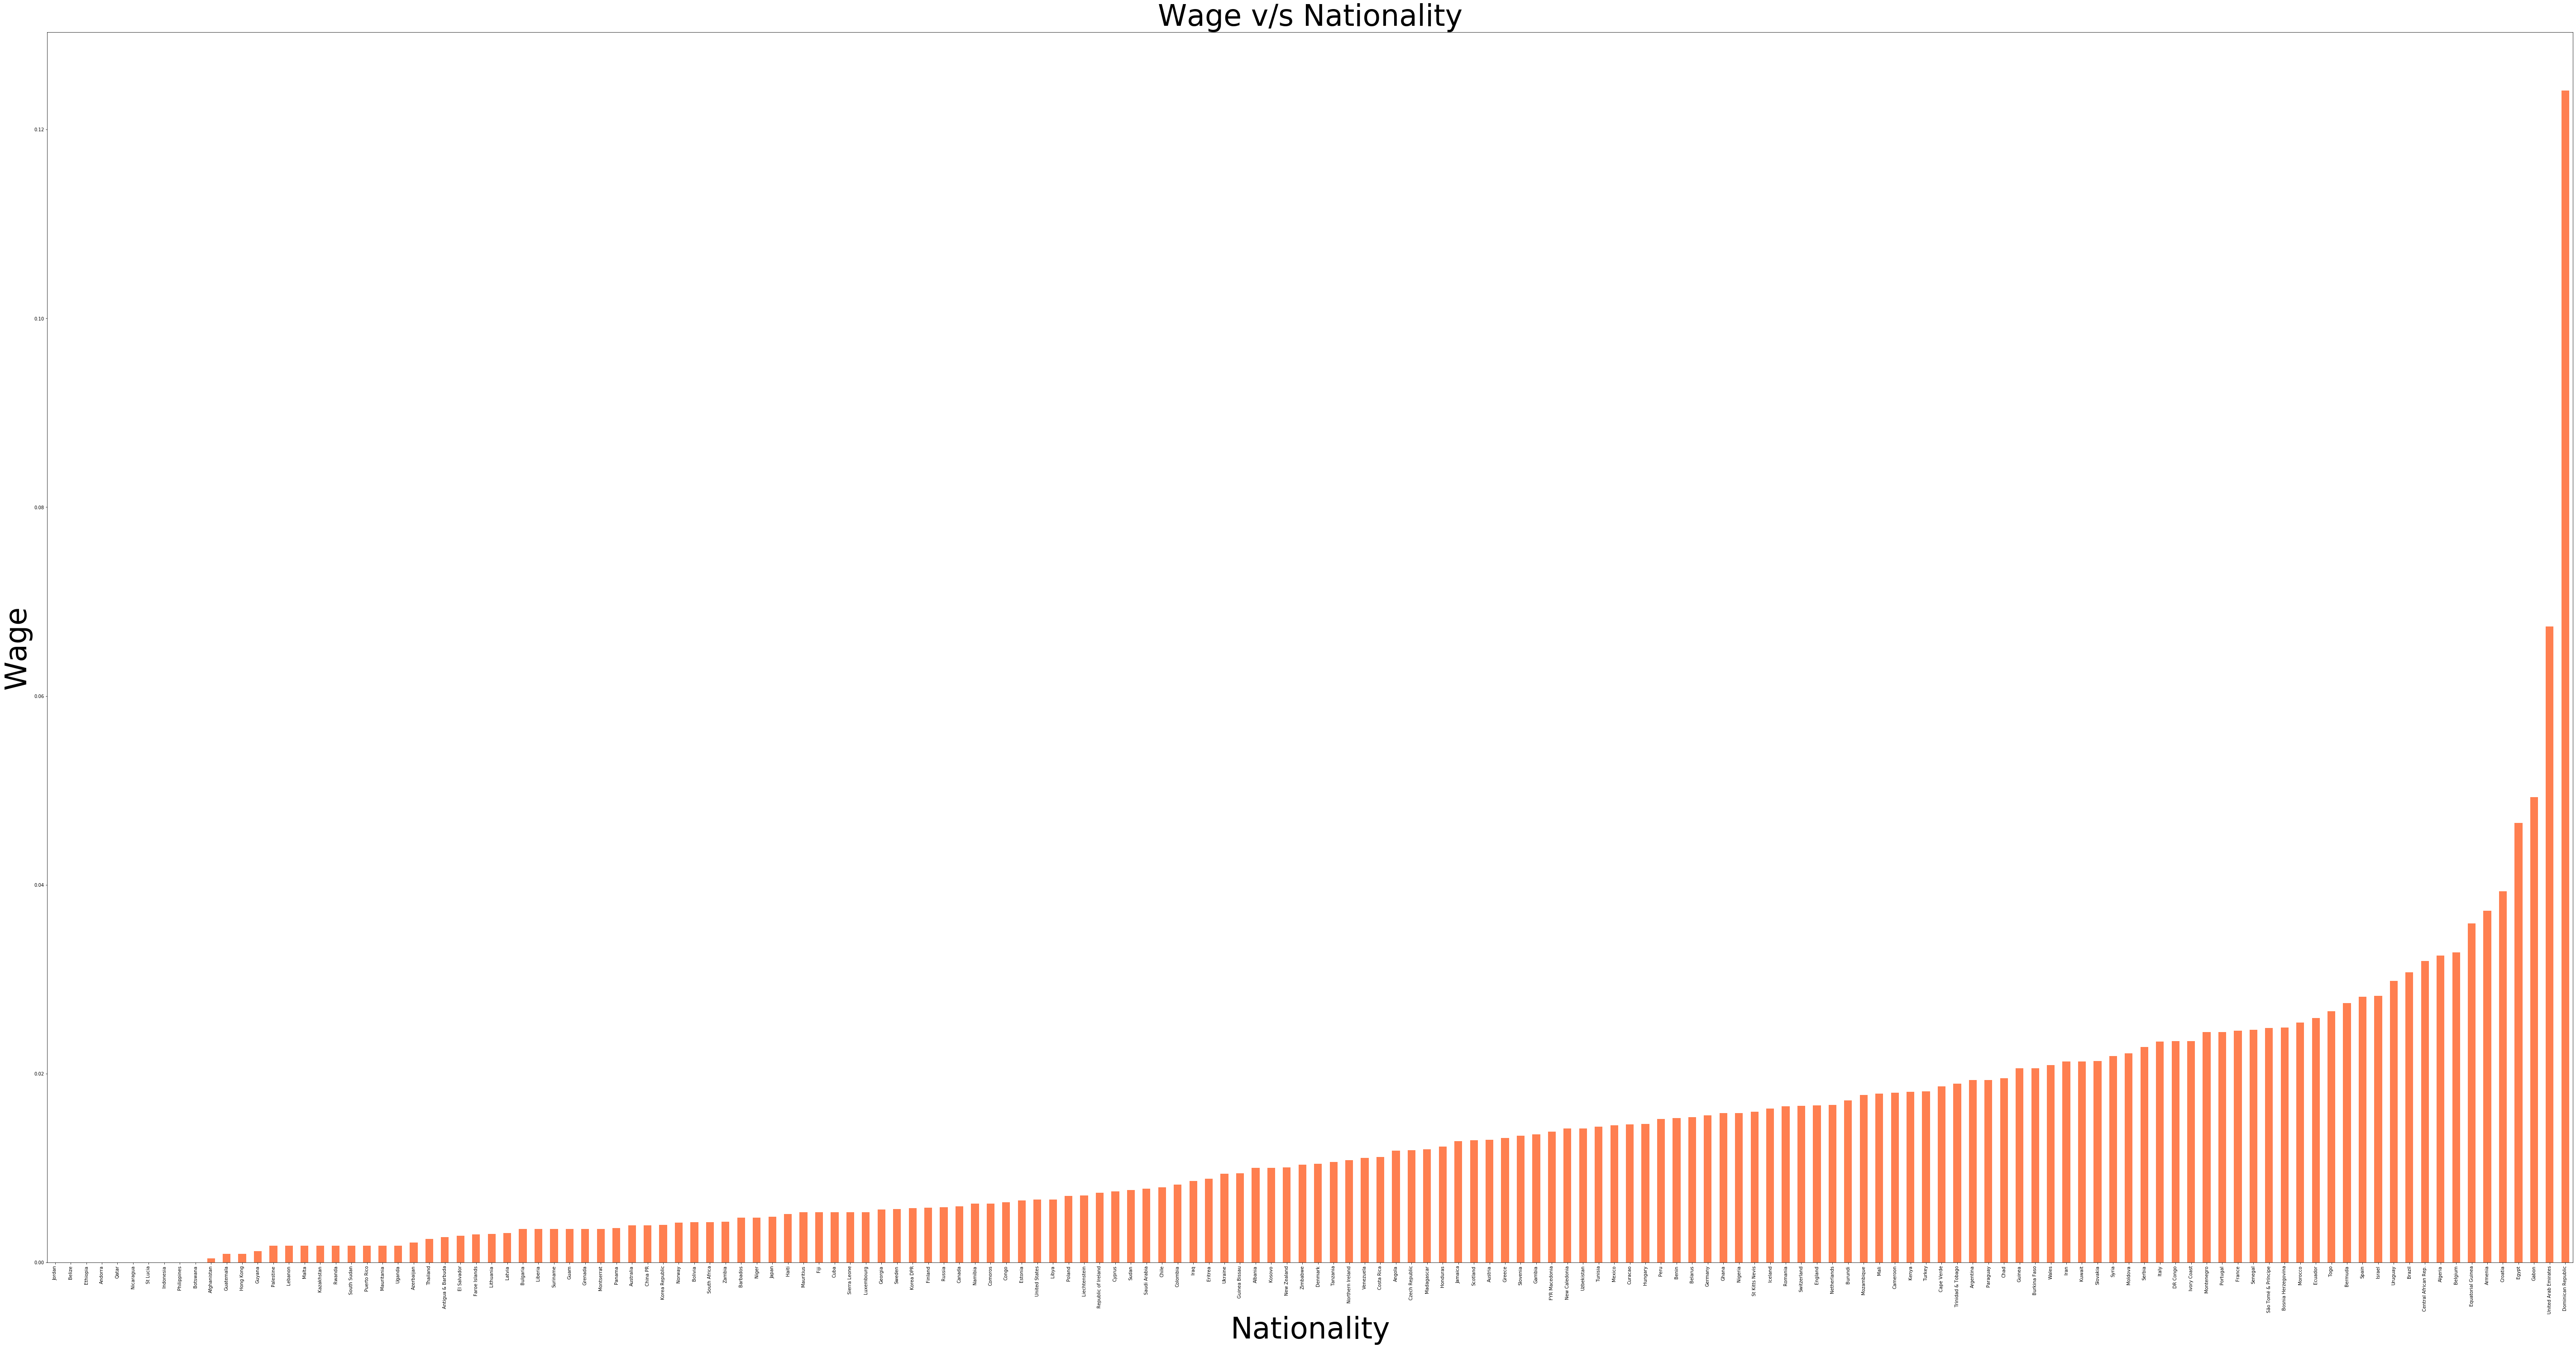

In [22]:
fig = pl.figure(figsize=(100, 50))
df.groupby('Nationality')['Wage'].mean().sort_values().plot(kind='bar', color='coral')
pl.title('Wage v/s Nationality', fontsize= 65)
pl.xlabel("Nationality", fontsize= 65)
pl.ylabel('Wage', fontsize= 65)
pl.show()

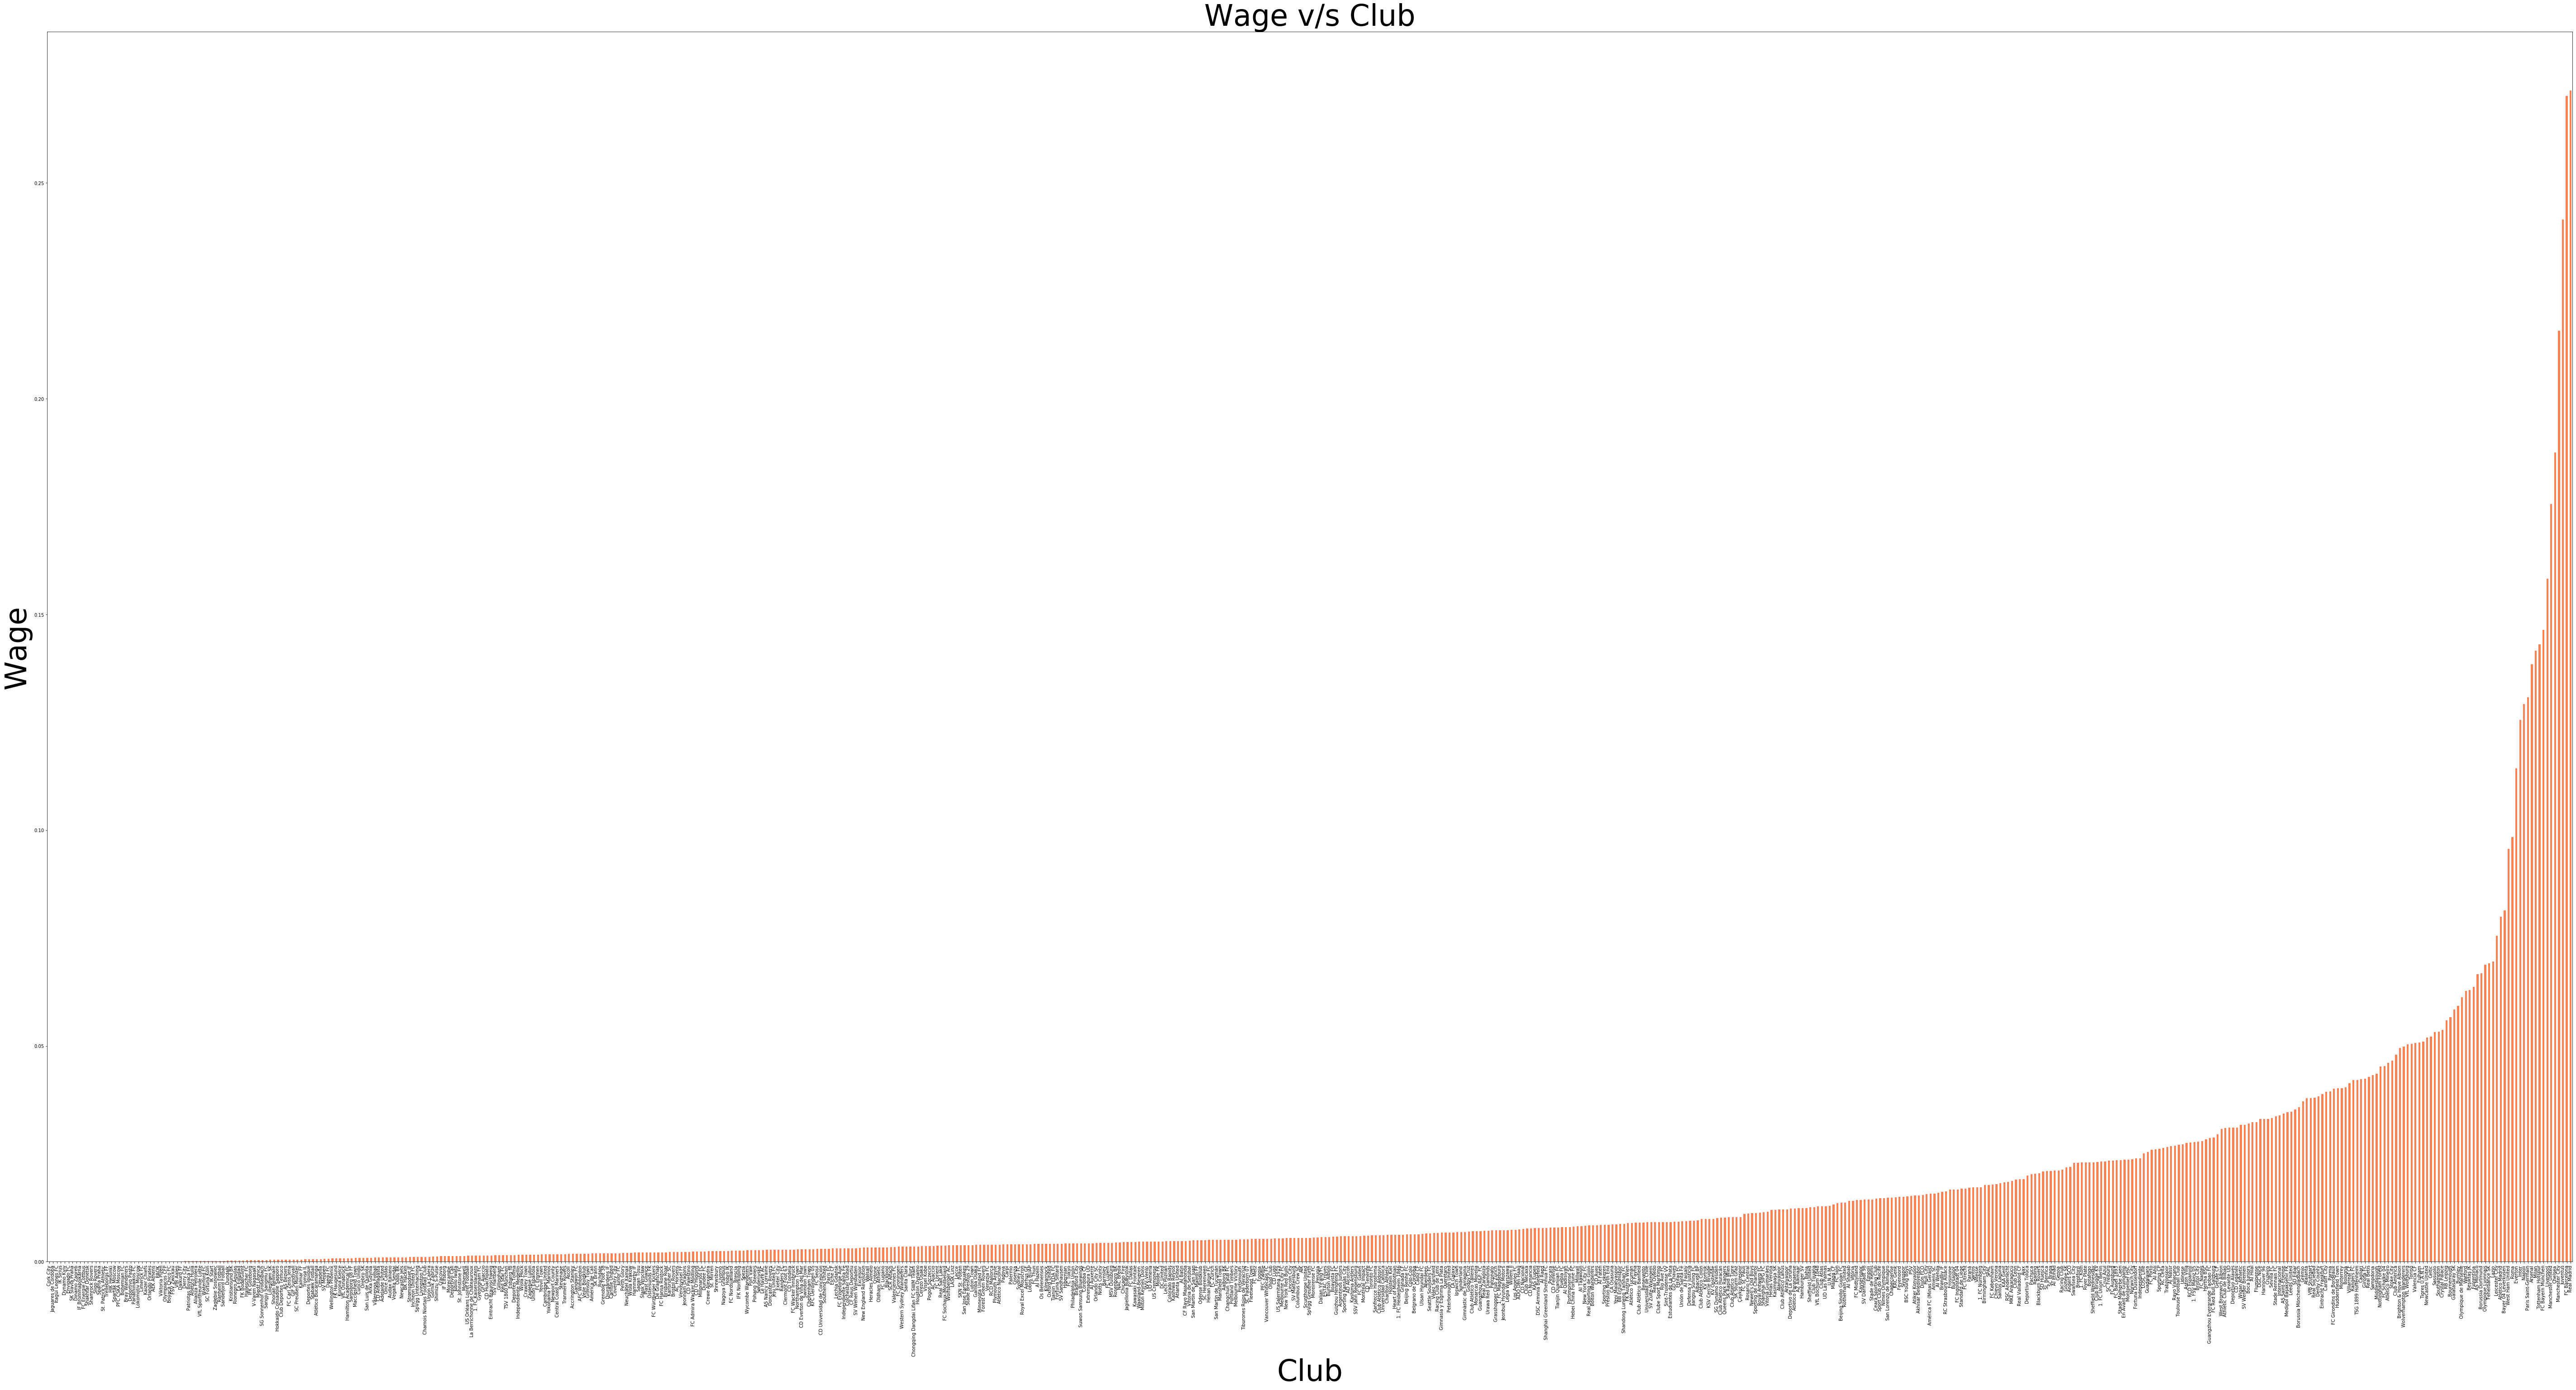

In [23]:
fig = pl.figure(figsize=(100, 50))
df.groupby('Club')['Wage'].mean().sort_values().plot(kind='bar', color='coral')
pl.title('Wage v/s Club', fontsize= 65)
pl.xlabel("Club", fontsize= 65)
pl.ylabel('Wage' , fontsize= 65)
pl.show()

##  Comparing Value and Categorical Variable

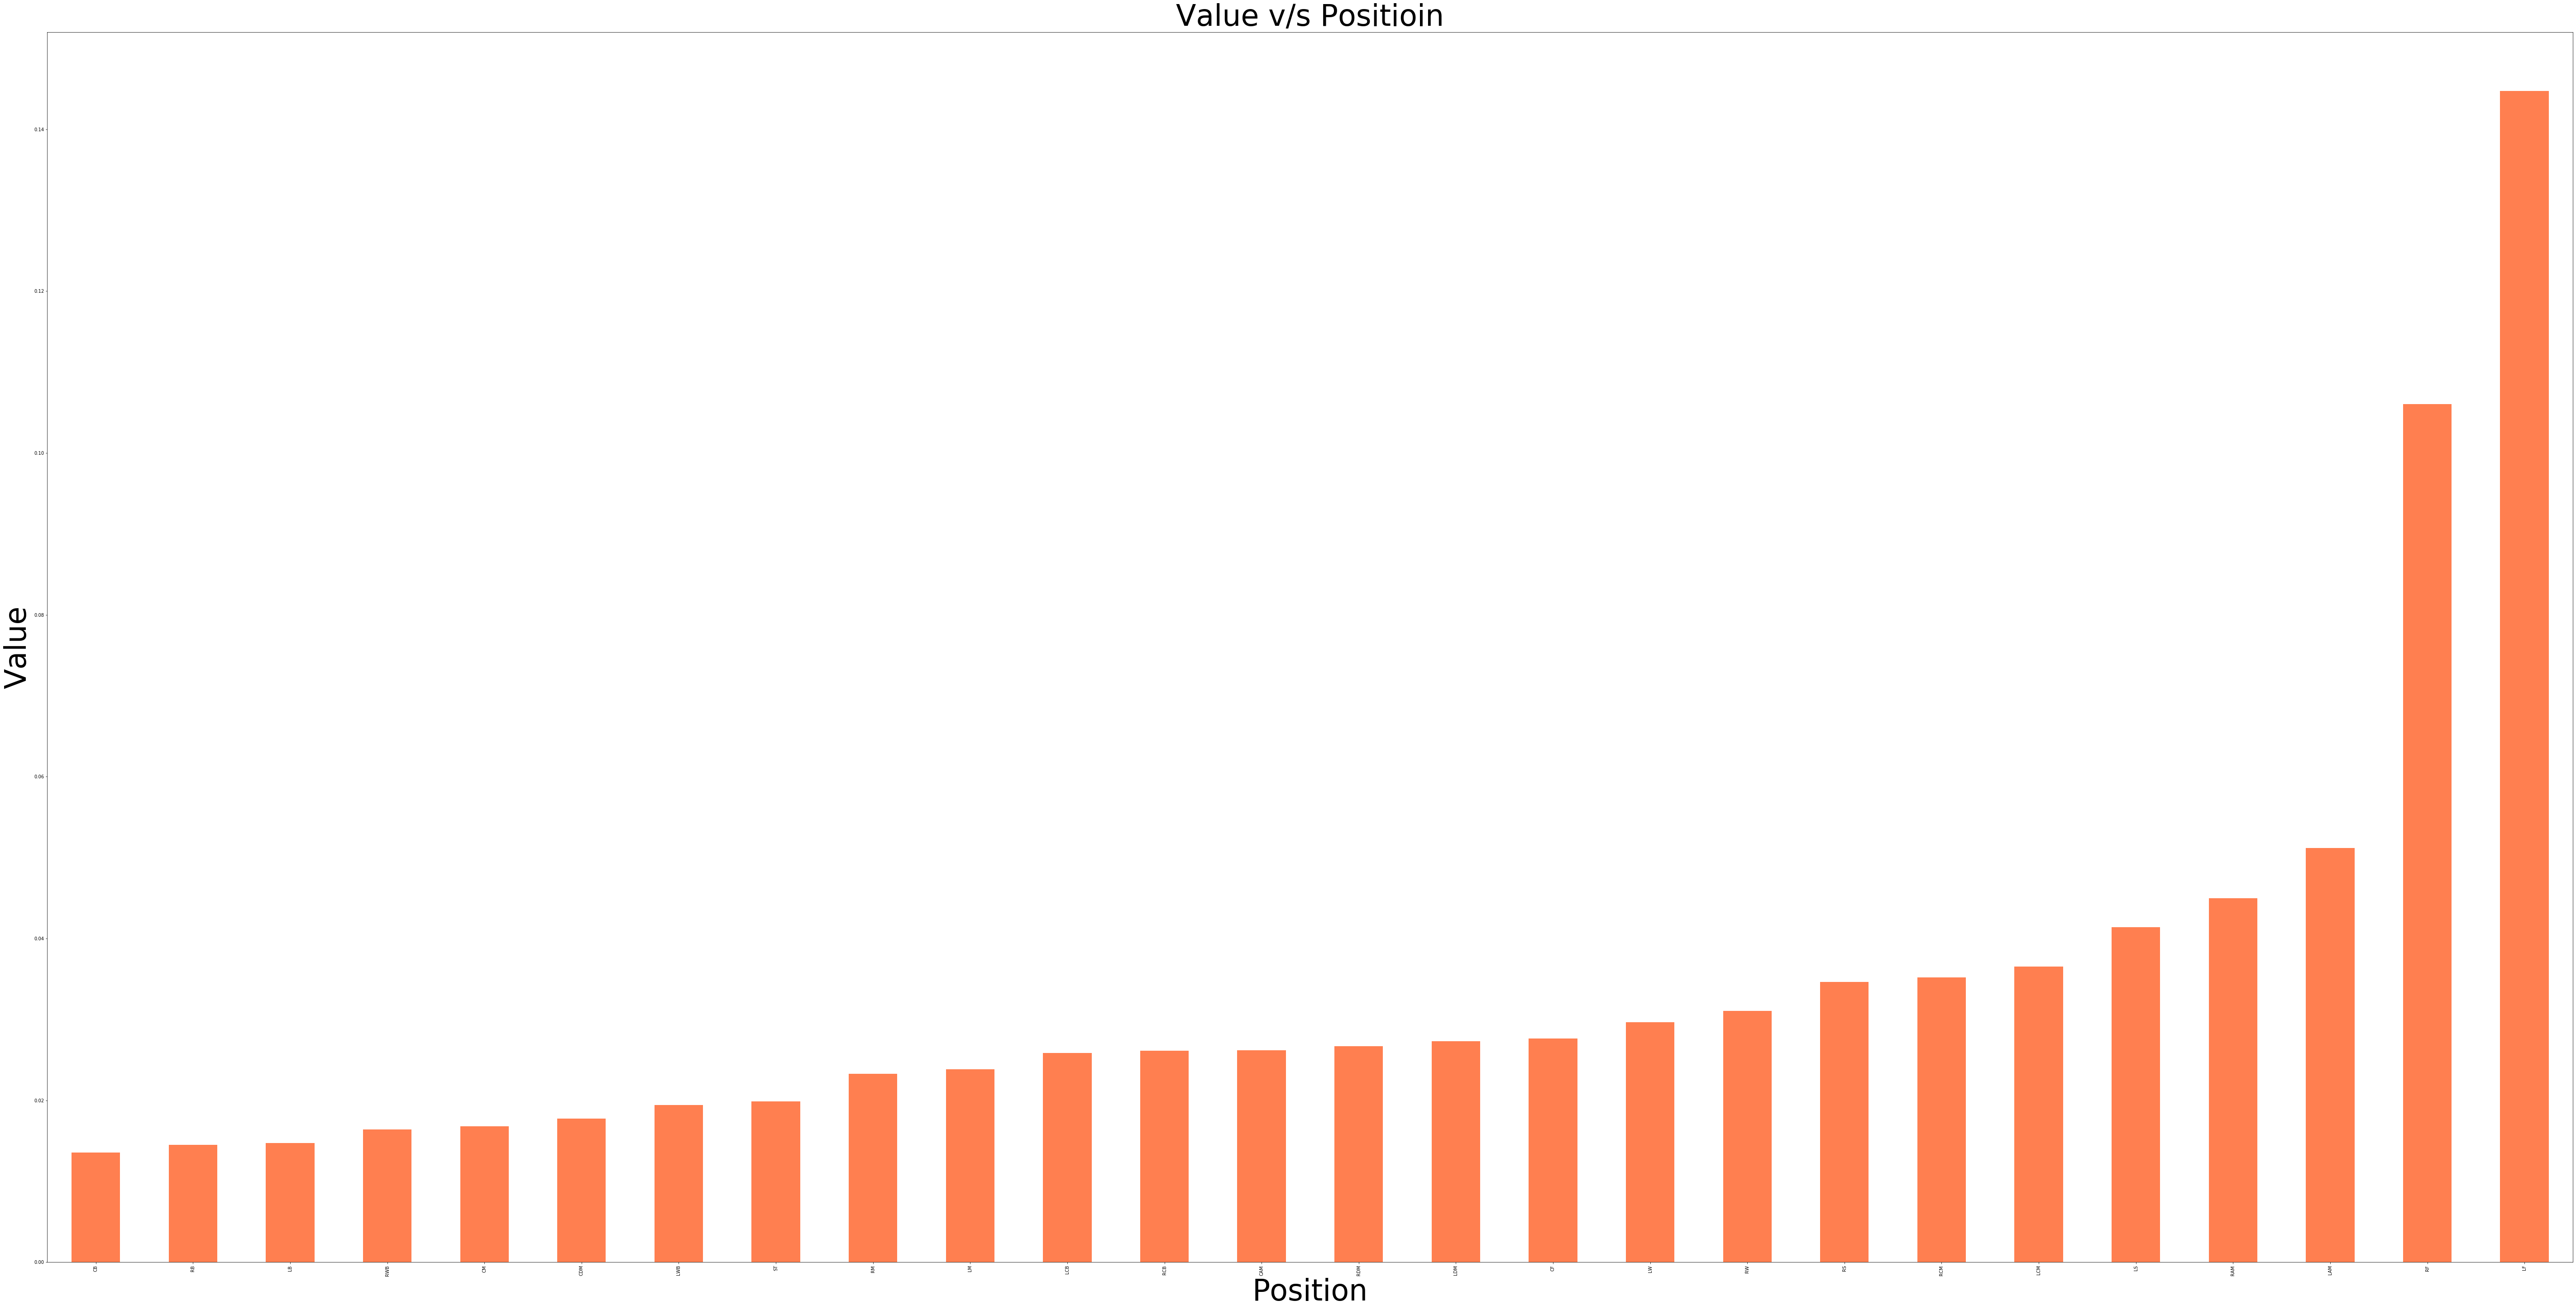

In [24]:


fig = pl.figure(figsize=(100, 50))
df.groupby('Position')['Value'].mean().sort_values().plot(kind='bar', color='coral')
pl.title('Value v/s Positioin', fontsize= 65)
pl.xlabel("Position", size= 65)
pl.ylabel('Value', size= 65)
pl.show()

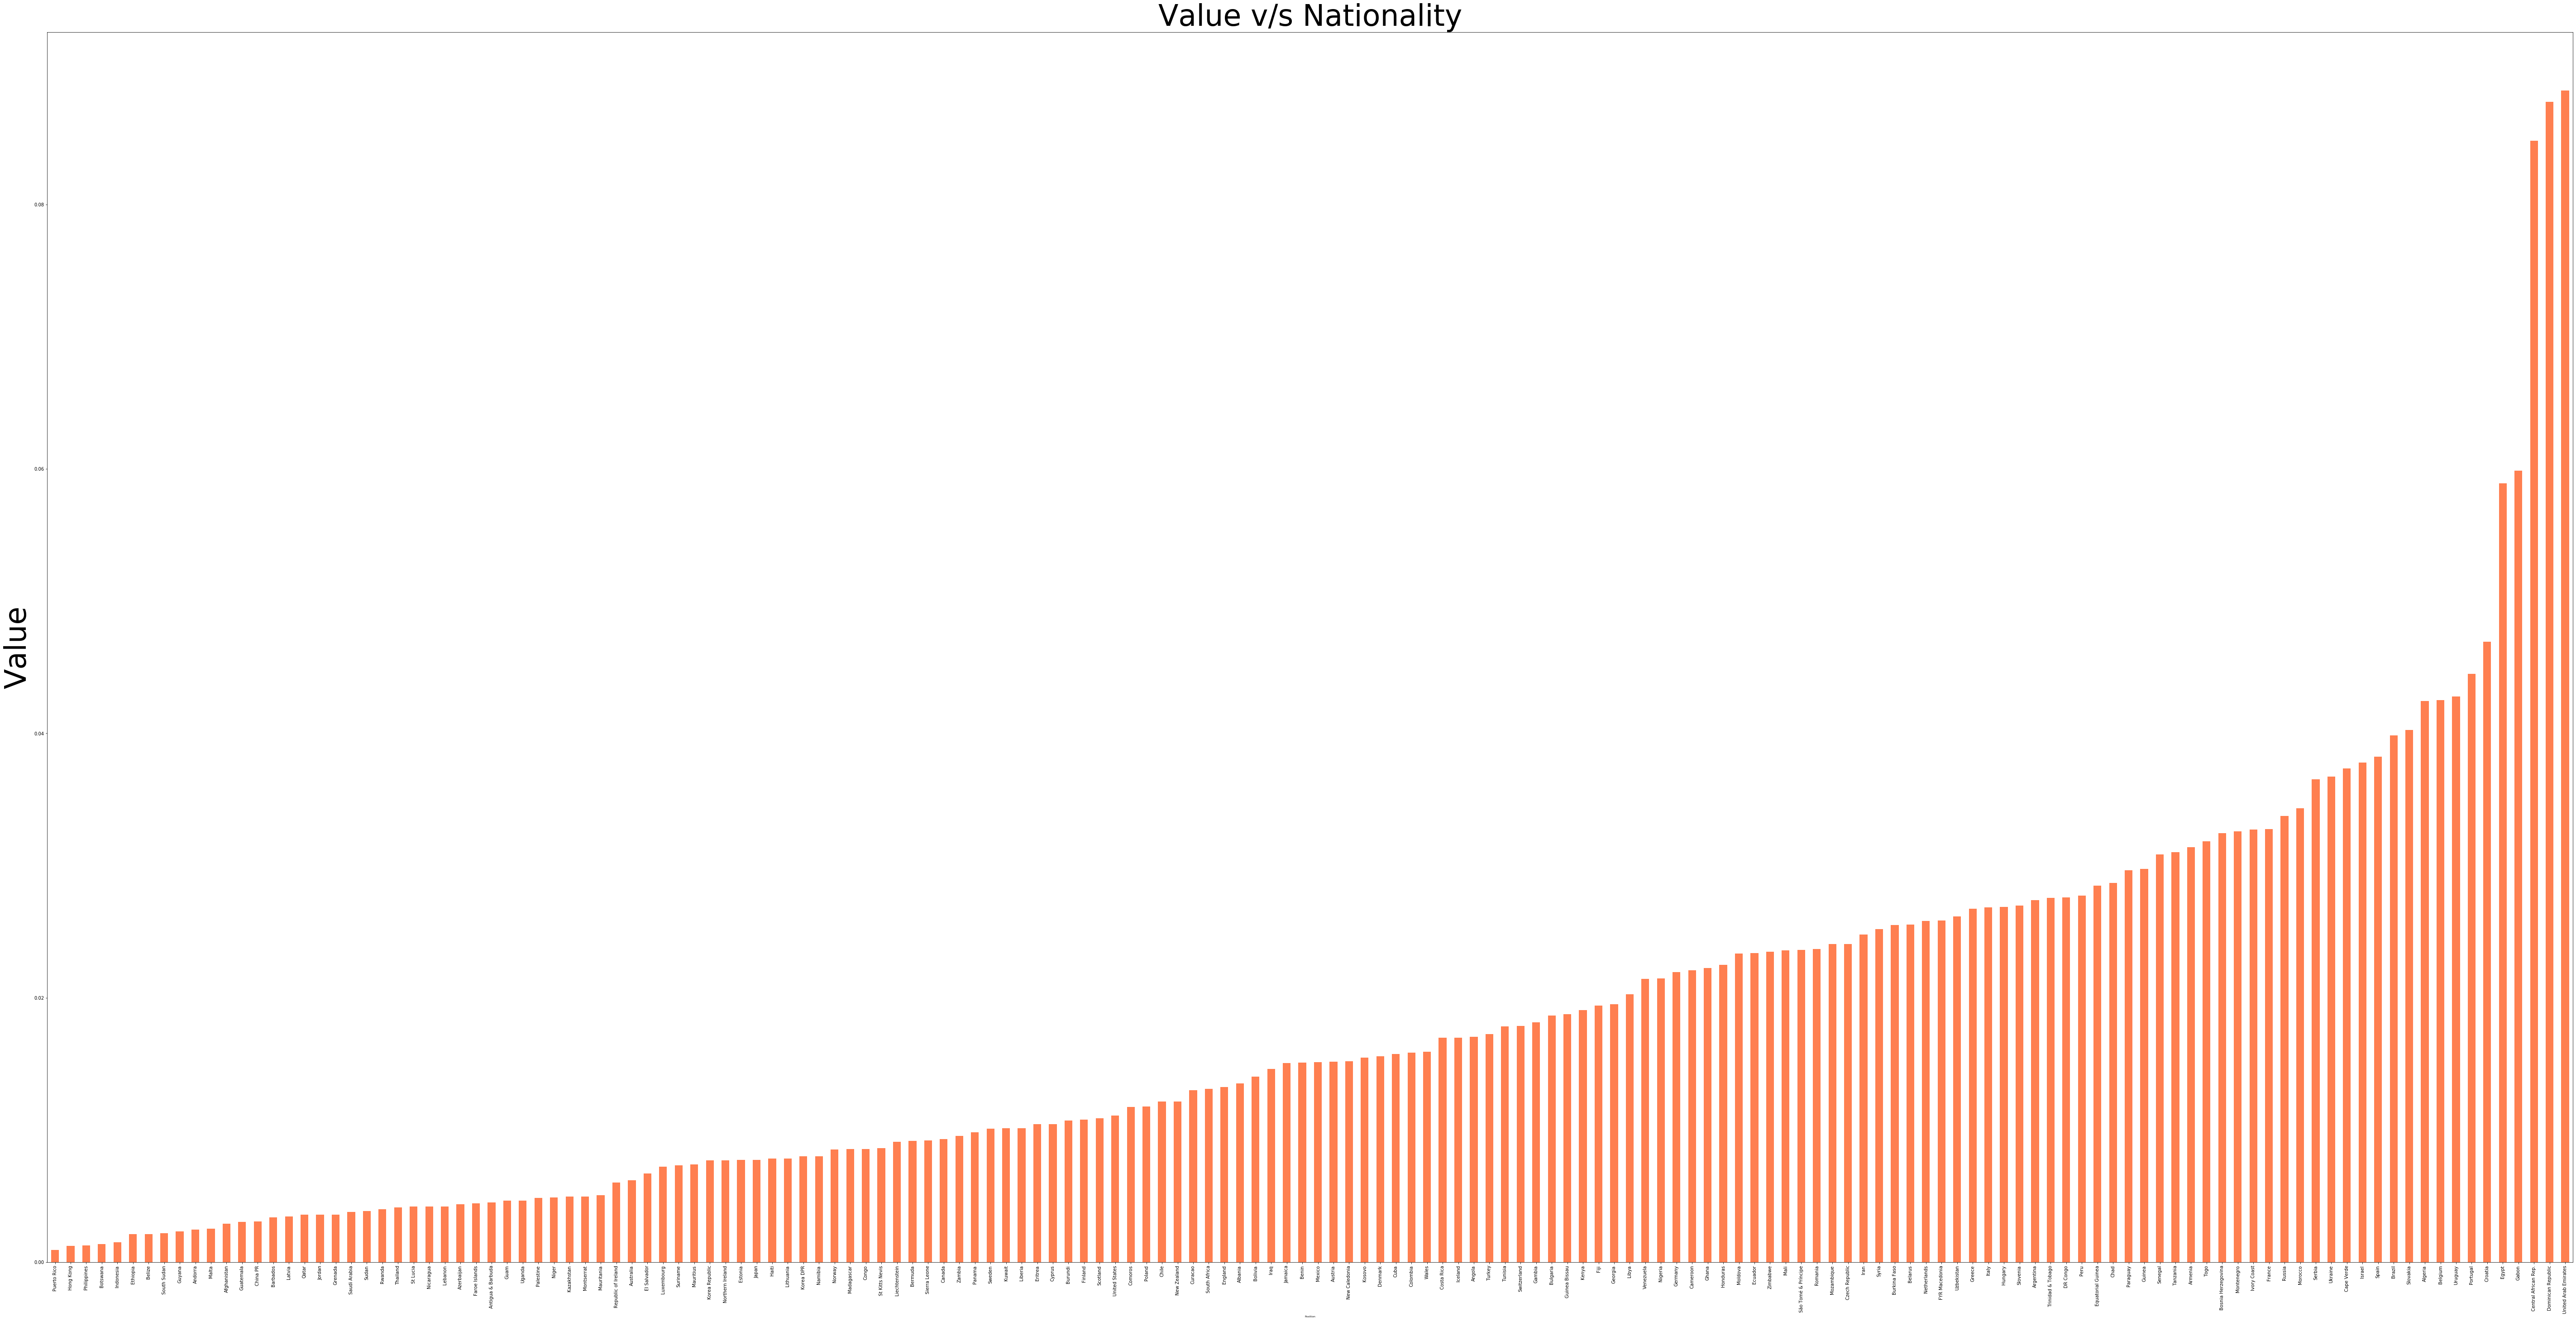

In [25]:


fig = pl.figure(figsize=(100, 50))
df.groupby('Nationality')['Value'].mean().sort_values().plot(kind='bar', color='coral')
pl.title('Value v/s Nationality', fontsize= 65)
pl.xlabel("Position", fontsize= 6)
pl.ylabel('Value', fontsize= 65)
pl.show()

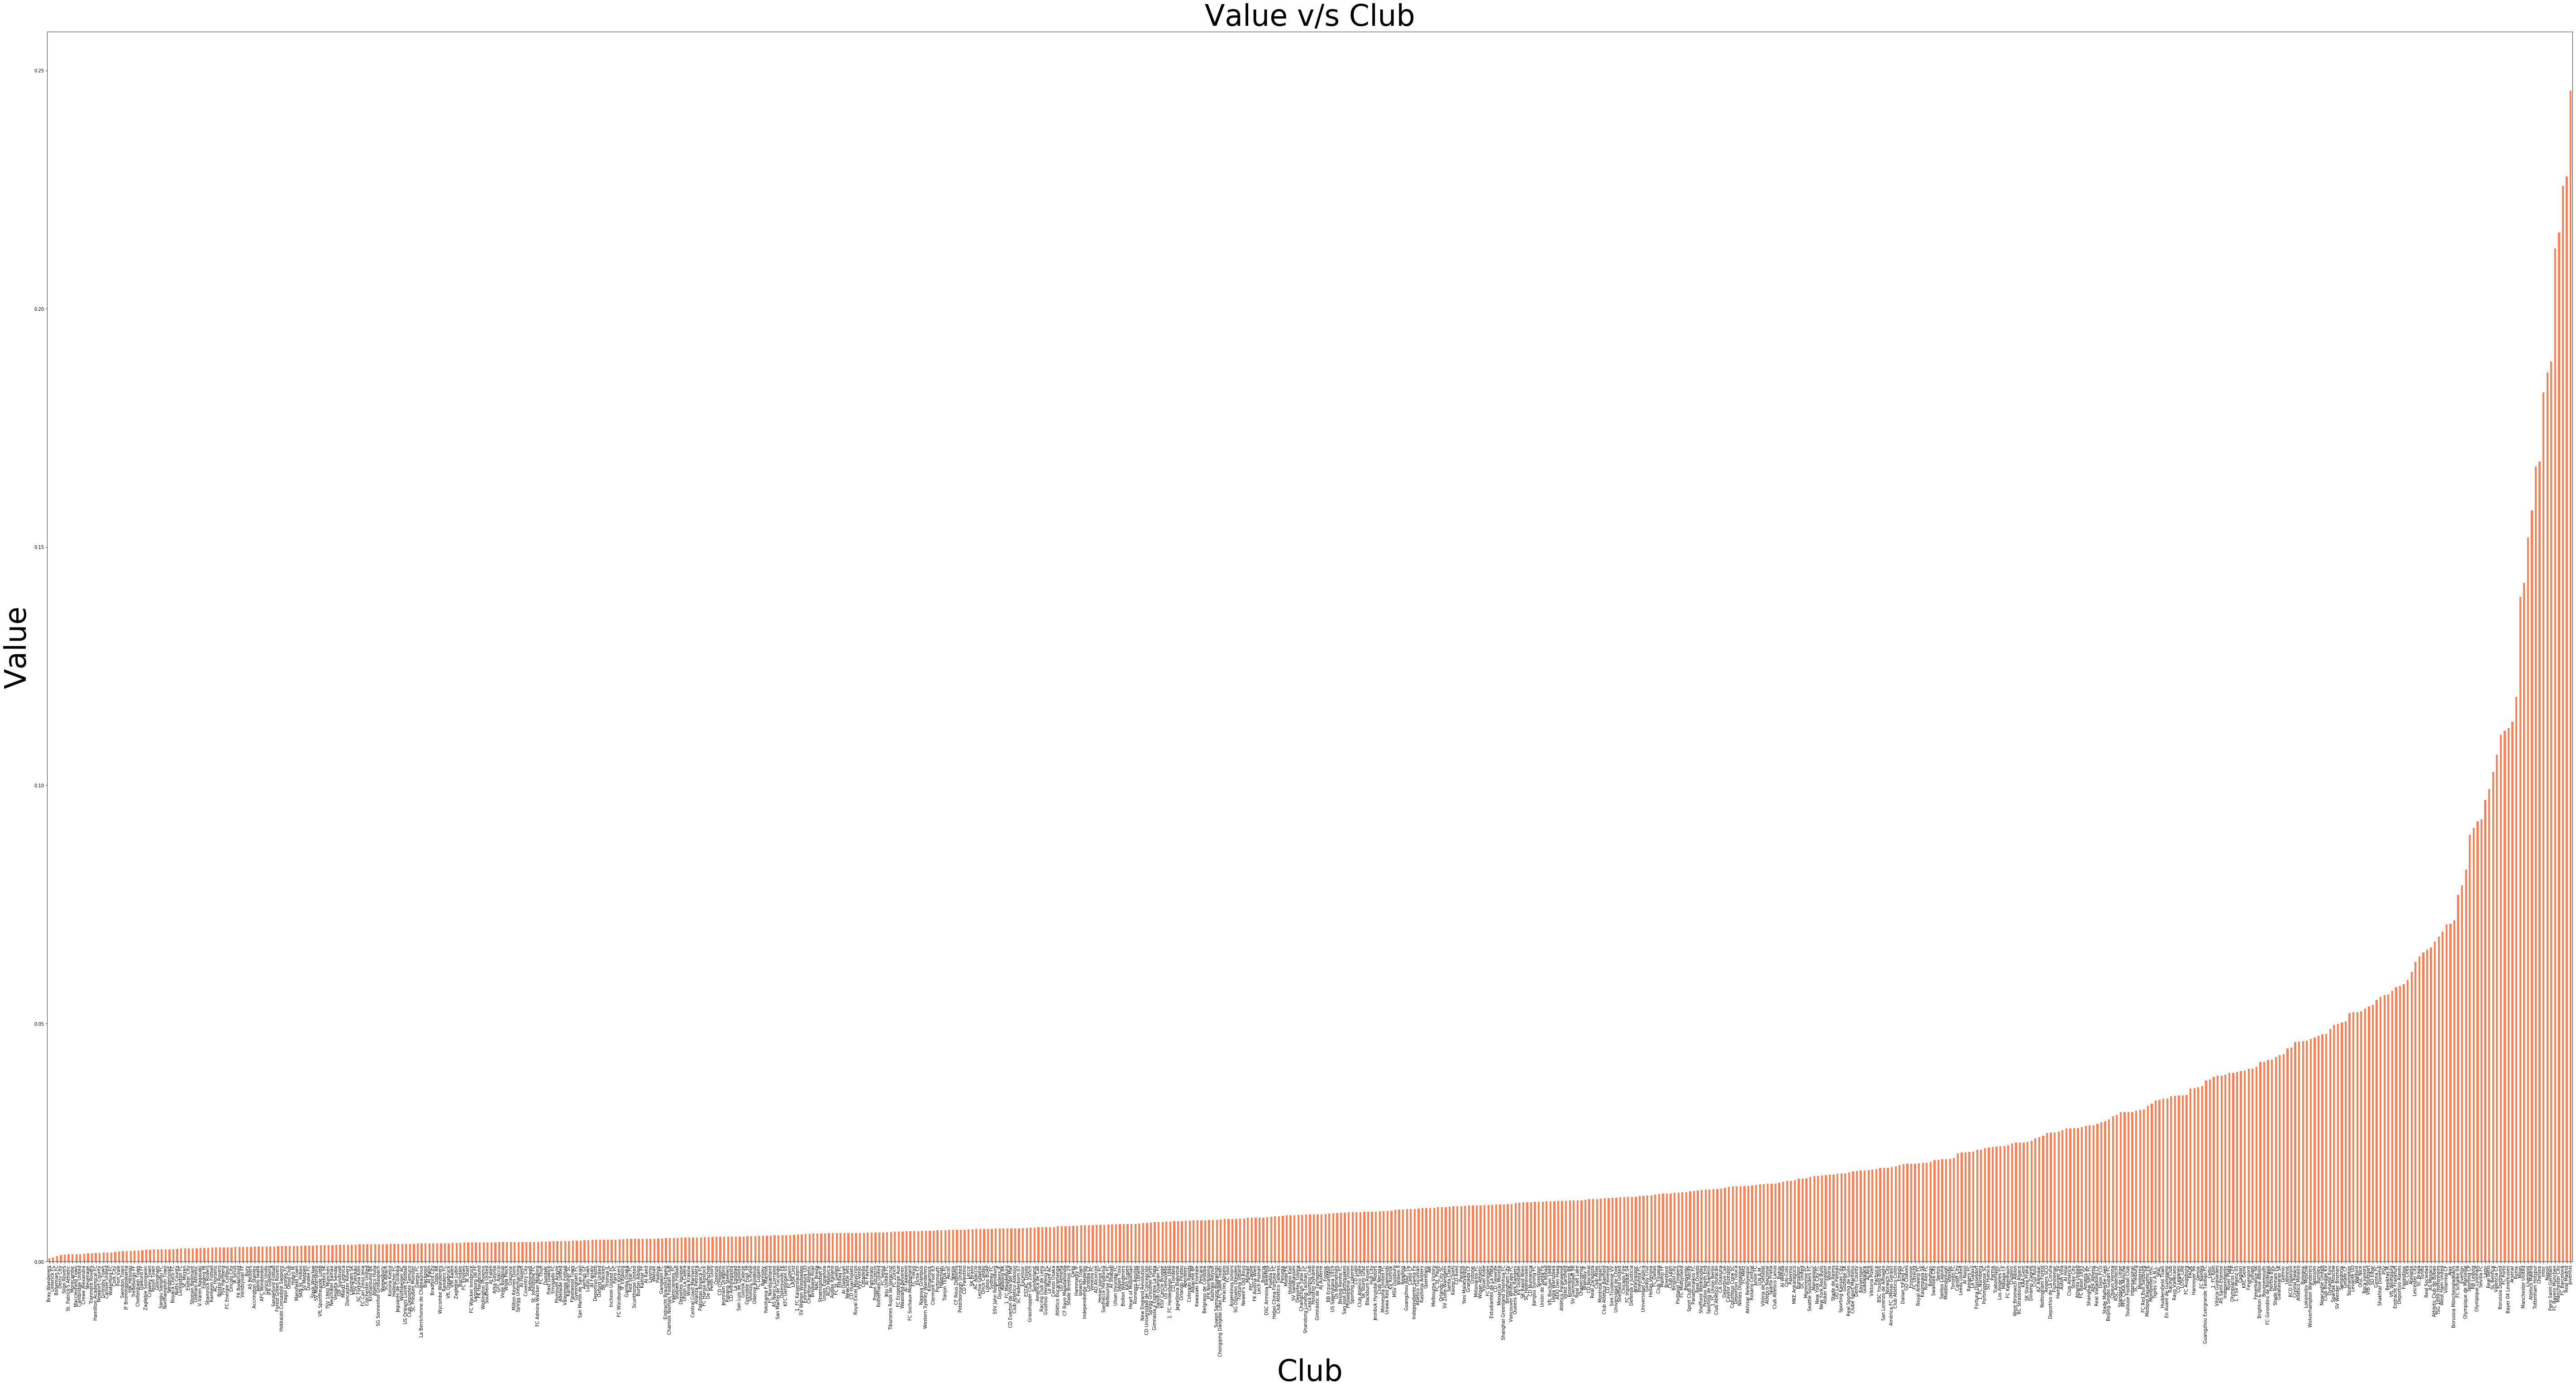

In [26]:

fig = pl.figure(figsize=(100, 50))
df.groupby('Club')['Value'].mean().sort_values().plot(kind='bar', color='coral')
pl.title('Value v/s Club', fontsize = 65)
pl.xlabel("Club" ,fontsize = 65)
pl.ylabel('Value', fontsize= 65)

pl.show()

In [27]:
new = df.filter(['Club','Position','Nationality'], axis=1)
new

# Creating a copy of data Frame

fd =df
fd2 =df


In [28]:
N = pd.get_dummies(df['Nationality'])
C = pd.get_dummies(df['Club'])
P = pd.get_dummies(df['Position'])
P.head(5)

CAM  CB  CDM  CF  CM  LAM  LB  LCB  LCM  LDM  ...  RB  RCB  RCM  RDM  RF  \
0    0   0    0   0   0    0   0    0    0    0  ...   0    0    0    0   1   
1    0   0    0   0   0    0   0    0    0    0  ...   0    0    0    0   0   
2    0   0    0   0   0    0   0    0    0    0  ...   0    0    0    0   0   
4    0   0    0   0   0    0   0    0    0    0  ...   0    0    1    0   0   
5    0   0    0   0   0    0   0    0    0    0  ...   0    0    0    0   0   

   RM  RS  RW  RWB  ST  
0   0   0   0    0   0  
1   0   0   0    0   1  
2   0   0   0    0   0  
4   0   0   0    0   0  
5   0   0   0    0   0  

[5 rows x 26 columns]

In [29]:
# Merging the categorical value to dataframe.


fd =df.merge(P,left_index=True, right_index=True)
fd.head(5)

Nationality  Overall  Potential                 Club     Value      Wage  \
0   Argentina       94         94         FC Barcelona  0.932489  1.000000   
1    Portugal       94         94             Juventus  0.649789  0.716312   
2      Brazil       92         93  Paris Saint-Germain  1.000000  0.512411   
4     Belgium       91         92      Manchester City  0.860759  0.627660   
5     Belgium       91         91              Chelsea  0.784810  0.601064   

   Special  International Reputation  Skill Moves Position  ...  RB  RCB  RCM  \
0     2202                       5.0          4.0       RF  ...   0    0    0   
1     2228                       5.0          5.0       ST  ...   0    0    0   
2     2143                       5.0          5.0       LW  ...   0    0    0   
4     2281                       4.0          4.0      RCM  ...   0    0    1   
5     2142                       4.0          4.0       LF  ...   0    0    0   

   RDM  RF  RM  RS  RW  RWB  ST  
0    0   1   0   0   0    0   0  
1    0   0   0   0   0    0   1  
2    0   0   0   0   0    0   0  
4    0   0   0   0   0    0   0  
5    0   0   0   0   0    0   0  

[5 rows x 63 columns]

## Seperating Variables.

In [30]:
# Seperating the Target variable{WAGE}  from Dataframe

y = df['Wage']
fd = fd.drop(columns =['Wage', 'Nationality', 'Club', 'Position']) 
x = fd


In [31]:
# Seperating the Target variable{VALUE}  from Dataframe

y2 = df['Value']
fd2 = fd2.drop(columns =['Value', 'Nationality', 'Club', 'Position']) 
x2 = fd2



In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15926 entries, 0 to 18206
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Overall                   15926 non-null  int64  
 1   Potential                 15926 non-null  int64  
 2   Value                     15926 non-null  float64
 3   Special                   15926 non-null  int64  
 4   International Reputation  15926 non-null  float64
 5   Skill Moves               15926 non-null  float64
 6   Crossing                  15926 non-null  float64
 7   Finishing                 15926 non-null  float64
 8   HeadingAccuracy           15926 non-null  float64
 9   ShortPassing              15926 non-null  float64
 10  Volleys                   15926 non-null  float64
 11  Dribbling                 15926 non-null  float64
 12  Curve                     15926 non-null  float64
 13  FKAccuracy                15926 non-null  float64
 14  LongPa

# Regression to Predict { Wage }.

In [39]:
# Splitting to test and Training dataset with regards to Wage.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

x_train.head(5)

Overall  Potential     Value  Special  International Reputation  \
5207       70         70  0.011814     1866                       1.0   
9280       66         66  0.002954     1770                       1.0   
8851       66         71  0.006118     1479                       1.0   
4005       71         71  0.006751     1885                       1.0   
1979       75         75  0.022785     1788                       1.0   

      Skill Moves  Crossing  Finishing  HeadingAccuracy  ShortPassing  ...  \
5207          2.0      69.0       61.0             61.0          65.0  ...   
9280          2.0      64.0       40.0             61.0          58.0  ...   
8851          2.0      53.0       19.0             61.0          57.0  ...   
4005          3.0      71.0       62.0             50.0          73.0  ...   
1979          2.0      72.0       25.0             72.0          73.0  ...   

      RB  RCB  RCM  RDM  RF  RM  RS  RW  RWB  ST  
5207   0    0    0    0   0   0   0   0    0   0  
9280   1    0    0    0   0   0   0   0    0   0  
8851   0    1    0    0   0   0   0   0    0   0  
4005   0    0    0    0   0   0   0   0    0   0  
1979   1    0    0    0   0   0   0   0    0   0  

[5 rows x 59 columns]

In [40]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=33)

x2_train.head(5)

Overall  Potential      Wage  Special  International Reputation  \
5207       70         70  0.015957     1866                       1.0   
9280       66         66  0.005319     1770                       1.0   
8851       66         71  0.001773     1479                       1.0   
4005       71         71  0.005319     1885                       1.0   
1979       75         75  0.085106     1788                       1.0   

      Skill Moves  Crossing  Finishing  HeadingAccuracy  ShortPassing  ...  \
5207          2.0      69.0       61.0             61.0          65.0  ...   
9280          2.0      64.0       40.0             61.0          58.0  ...   
8851          2.0      53.0       19.0             61.0          57.0  ...   
4005          3.0      71.0       62.0             50.0          73.0  ...   
1979          2.0      72.0       25.0             72.0          73.0  ...   

      LongShots  Aggression  Interceptions  Positioning  Vision  Penalties  \
5207       52.0        74.0           70.0         66.0    64.0       52.0   
9280       49.0        64.0           65.0         49.0    58.0       59.0   
8851       22.0        58.0           70.0         30.0    43.0       19.0   
4005       65.0        81.0           43.0         65.0    72.0       77.0   
1979       62.0        75.0           72.0         57.0    63.0       44.0   

      Composure  Marking  StandingTackle  SlidingTackle  
5207       68.0     70.0            65.0           61.0  
9280       74.0     69.0            65.0           70.0  
8851       59.0     68.0            67.0           63.0  
4005       71.0     52.0            49.0           41.0  
1979       71.0     74.0            79.0           76.0  

[5 rows x 33 columns]

### Applying Regression on data with target Wage.

In [58]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

w = standRegres(x_train,y_train)
print(w)



[[ 2.03764576e-04]
 [-1.92421869e-04]
 [ 6.29246129e-01]
 [ 9.82983760e-07]
 [ 1.71563999e-02]
 [-1.91925790e-03]
 [ 8.71260392e-05]
 [-1.47366818e-05]
 [ 4.14026415e-05]
 [-2.31751772e-06]
 [-1.06280639e-05]
 [ 2.05416547e-05]
 [ 1.33049330e-05]
 [-7.62996123e-05]
 [-7.61267210e-05]
 [ 7.95301740e-05]
 [-9.00611468e-05]
 [ 3.82593068e-05]
 [ 4.64484743e-05]
 [-5.15138264e-05]
 [ 1.40155639e-05]
 [ 2.22836869e-05]
 [-9.08818631e-05]
 [ 2.78556627e-05]
 [-7.77156229e-06]
 [ 3.93577989e-05]
 [-1.30902494e-05]
 [-3.14975198e-06]
 [ 5.76959676e-05]
 [-1.91304558e-05]
 [-2.93762910e-05]
 [-4.72673615e-05]
 [ 1.86011326e-04]
 [-1.99706292e-02]
 [-1.92616647e-02]
 [-2.08758369e-02]
 [-2.23653103e-02]
 [-1.91153440e-02]
 [-9.73133355e-03]
 [-1.95764806e-02]
 [-2.31316597e-02]
 [-2.24554348e-02]
 [-2.21218764e-02]
 [-4.40639453e-02]
 [-1.93384538e-02]
 [-2.19531496e-02]
 [-1.62053542e-02]
 [-2.27536484e-02]
 [-2.33742044e-02]
 [-1.98790646e-02]
 [-1.95081567e-02]
 [-2.14672592e-02]
 [-1.9639916

In [44]:
# computing the predictions {Wage} using regression coefficients:
xMat=np.mat(x_train)
yMat=np.mat(y_train)
yHat = xMat*w

yHat = yHat.A.ravel()
print(yHat)

# Computing the errors.
errors = abs(yHat - y_train)

#Dot product of the error gives Sum of squared errors.

tot_errors = np.dot(errors,errors)
print("\n Sum of Squared Errors WAGE: ",tot_errors)

# Computing RMSE
rmse_train = np.sqrt(tot_errors/len(yHat))
print("\n RMSE of Training Data WAGE: ", rmse_train)

[0.00898602 0.00677089 0.00611917 ... 0.00948139 0.02818008 0.0069436 ]

 Sum of Squared Errors WAGE:  5.094969478848788

 RMSE of Training Data WAGE:  0.01999797768199591


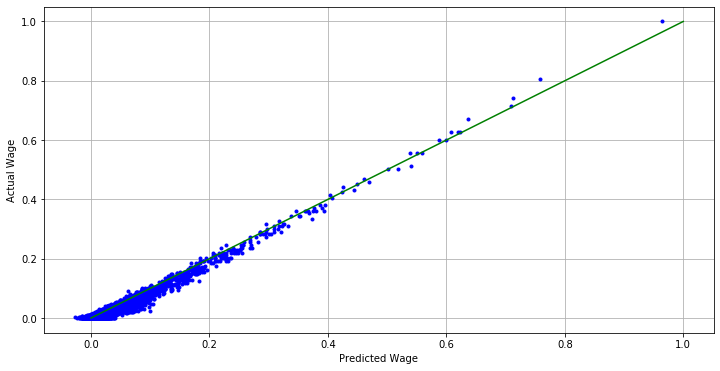

In [46]:
# Ploting predicted values against the actual values on the training data.

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 6))
plt.plot(yHat, y_train,'bo', markersize=3)
plt.plot([0,1],[0,1], 'g-')
plt.xlabel('Predicted Wage')
plt.ylabel('Actual Wage')
pl.grid()
plt.show()





In [49]:
# Regression Coefficients on Wage: 

for i in range(len(x_train.columns)):
    print(x_train.columns[i], w[i])

Overall [[0.00020376]]
Potential [[-0.00019242]]
Value [[0.62924613]]
Special [[9.8298376e-07]]
International Reputation [[0.0171564]]
Skill Moves [[-0.00191926]]
Crossing [[8.71260392e-05]]
Finishing [[-1.47366818e-05]]
HeadingAccuracy [[4.14026415e-05]]
ShortPassing [[-2.31751772e-06]]
Volleys [[-1.06280639e-05]]
Dribbling [[2.05416547e-05]]
Curve [[1.3304933e-05]]
FKAccuracy [[-7.62996123e-05]]
LongPassing [[-7.6126721e-05]]
BallControl [[7.9530174e-05]]
Acceleration [[-9.00611468e-05]]
SprintSpeed [[3.82593068e-05]]
Agility [[4.64484743e-05]]
Reactions [[-5.15138264e-05]]
Balance [[1.40155639e-05]]
ShotPower [[2.22836869e-05]]
Stamina [[-9.08818631e-05]]
LongShots [[2.78556627e-05]]
Aggression [[-7.77156229e-06]]
Interceptions [[3.93577989e-05]]
Positioning [[-1.30902494e-05]]
Vision [[-3.14975198e-06]]
Penalties [[5.76959676e-05]]
Composure [[-1.91304558e-05]]
Marking [[-2.9376291e-05]]
StandingTackle [[-4.72673615e-05]]
SlidingTackle [[0.00018601]]
CAM [[-0.01997063]]
CB [[-0.019

### Applying Regression on data with target Wage.

In [43]:
w2 = standRegres(x2_train,y2_train)
print(w2)

[[ 5.23446954e-04]
 [ 1.97995774e-04]
 [ 8.78049746e-01]
 [-2.28756679e-04]
 [ 1.31158918e-02]
 [ 3.76214873e-03]
 [ 8.32349578e-05]
 [ 3.20318937e-04]
 [ 9.97066994e-05]
 [ 1.75129458e-04]
 [ 2.65586502e-04]
 [ 2.41400189e-04]
 [ 2.40013883e-04]
 [ 3.11940725e-04]
 [ 3.31387864e-04]
 [ 1.38597308e-04]
 [ 3.18389251e-04]
 [ 1.93358727e-04]
 [ 8.78978973e-05]
 [ 5.58394435e-04]
 [-3.66669635e-05]
 [ 9.30801880e-05]
 [ 4.55947189e-04]
 [ 2.78521726e-04]
 [ 1.97943871e-04]
 [ 2.14736617e-04]
 [ 2.17473042e-04]
 [ 2.30700194e-04]
 [-7.62723189e-05]
 [ 4.79003267e-05]
 [ 2.63173074e-04]
 [ 3.02722488e-04]
 [-2.92658619e-05]]


In [45]:
# computing the predictions {Wage} using regression coefficients:
xMat=np.mat(x2_train)
yMat=np.mat(y2_train)
yHat = xMat*w2

yHat = yHat.A.ravel()
print(yHat)

# Computing the errors.
errors = abs(yHat - y2_train)

#Dot product of the error gives Sum of squared errors.

tot_errors = np.dot(errors,errors)
print("\n Sum of Squared Errors VALUE: ",tot_errors)

# Computing RMSE
rmse_train = np.sqrt(tot_errors/len(yHat))
print("\n RMSE of Training Data VALUE: ", rmse_train)

[ 0.02037398 -0.00650971  0.00560208 ...  0.01202171  0.02168913
  0.00051265]

 Sum of Squared Errors VALUE:  7.027851909213259

 RMSE of Training Data VALUE:  0.023486948025824038


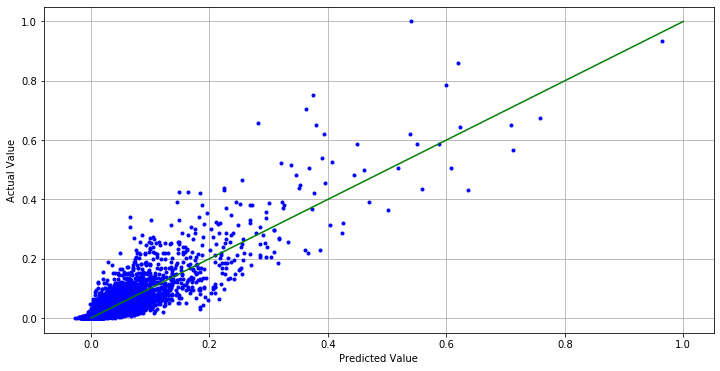

In [48]:
# Ploting predicted values against the actual values on the training data.

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 6))
plt.plot(yHat, y2_train,'bo', markersize=3)
plt.plot([0,1],[0,1], 'g-')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.grid()
plt.show()

In [50]:
# Regression Coefficients on Wage: 

for i in range(len(x2_train.columns)):
    print(x2_train.columns[i], w[i])

Overall [[0.00020376]]
Potential [[-0.00019242]]
Wage [[0.62924613]]
Special [[9.8298376e-07]]
International Reputation [[0.0171564]]
Skill Moves [[-0.00191926]]
Crossing [[8.71260392e-05]]
Finishing [[-1.47366818e-05]]
HeadingAccuracy [[4.14026415e-05]]
ShortPassing [[-2.31751772e-06]]
Volleys [[-1.06280639e-05]]
Dribbling [[2.05416547e-05]]
Curve [[1.3304933e-05]]
FKAccuracy [[-7.62996123e-05]]
LongPassing [[-7.6126721e-05]]
BallControl [[7.9530174e-05]]
Acceleration [[-9.00611468e-05]]
SprintSpeed [[3.82593068e-05]]
Agility [[4.64484743e-05]]
Reactions [[-5.15138264e-05]]
Balance [[1.40155639e-05]]
ShotPower [[2.22836869e-05]]
Stamina [[-9.08818631e-05]]
LongShots [[2.78556627e-05]]
Aggression [[-7.77156229e-06]]
Interceptions [[3.93577989e-05]]
Positioning [[-1.30902494e-05]]
Vision [[-3.14975198e-06]]
Penalties [[5.76959676e-05]]
Composure [[-1.91304558e-05]]
Marking [[-2.9376291e-05]]
StandingTackle [[-4.72673615e-05]]
SlidingTackle [[0.00018601]]


In [53]:
wf = w.A.ravel()
wf2 = w2.A.ravel()

### Cross Validation

In [54]:
# K fold cross validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=32, shuffle=True)


In [55]:
# Crossvalidation with Wage:

xval_err = 0
print("Wage:\n")

for train, test in kfold.split(x_train):
    x_fold_train = x_train[x_train.index.isin(train)]
    y_fold_train= y_train[y_train.index.isin(train)]

    w = standRegres(x_fold_train,y_fold_train)

    xMat=np.mat(x_fold_train)
    yMat=np.mat(y_fold_train)
    yHat = xMat*w
    yHat = yHat.A.ravel()
    
    error = abs(yHat - y_fold_train)
    tot_errors = np.dot(error,error)
    
    rmse = np.sqrt(np.dot(error,error)/len(x_fold_train))
    print(rmse)
    xval_err += rmse

Wage:

0.02374129566444856
0.02330423330300026
0.023825156679312464
0.023958494864337595
0.023446547815233296
0.023641521347097683
0.02342857004176741
0.02327367101935916
0.023362846706271596
0.023359721614723137


In [56]:
xval_err = 0
print("Value:\n")
for train, test in kfold.split(x2_train):
    x2_fold_train = x2_train[x2_train.index.isin(train)]
    y2_fold_train= y2_train[y2_train.index.isin(train)]

    w = standRegres(x2_fold_train,y2_fold_train)

    xMat=np.mat(x2_fold_train)
    yMat=np.mat(y2_fold_train)
    yHat = xMat*w
    yHat = yHat.A.ravel()
    
    error = abs(yHat - y2_fold_train)
    tot_errors = np.dot(error,error)
    
    rmse = np.sqrt(np.dot(error,error)/len(x2_fold_train))
    print(rmse)
    xval_err += rmse

Value:

0.027633642214767294
0.02717306534792312
0.02722334006252086
0.027784440958967708
0.02736077974191126
0.0275777668546822
0.026954102817580348
0.027675451250157933
0.02730899267059172
0.02755376930293588


# ########

In [59]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score, cross_validate


linreg = LinearRegression()

percentile = range(5, 101, 5)
results = []
print("Wage:\n")
for i in percentile:
    feature_select = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_feature_select = feature_select.fit_transform(x_train, y_train)
    scores = cross_val_score(linreg, x_train_feature_select, y_train, cv=5)
    print(i , scores.mean())
    results = np.append(results, scores.mean())
    
optimal_percentile_ind = np.where(results == results.max())[0][0]
print('\n')
print("Optimal Percintile:",optimal_percentile_ind)

optimal_percentile_index = np.where(results == results.max())[0][0]
print("Optimal percentile of features:",percentile[optimal_percentile_index])
optimal_num_features = int(percentile[optimal_percentile_index]*len(fd.columns)/100)
print("Number of optimal features:",optimal_num_features)


Wage:

5 0.7529992802636196
10 0.7531895217216581
15 0.753203065439197
20 0.7536078109066174
25 0.7539904580880046
30 0.7540737685414057
35 0.7543800838470661
40 0.7551546274821945
45 0.7551513962068666
50 0.7551304845216971
55 0.7554810846592539
60 0.7546866331053776
65 0.7545492408017511
70 0.7545910505194452
75 0.7545444554411407
80 0.7545455249874538
85 0.7544735742626638
90 0.7545720788800097
95 0.7548775667156173
100 0.7546729171667782


Optimal Percintile: 10
Optimal percentile of features: 55
Number of optimal features: 32


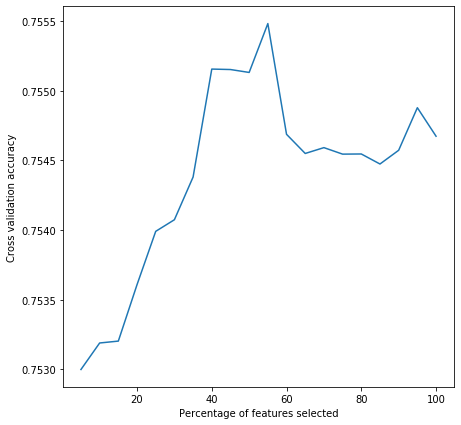

In [60]:
# Graph of percentile of features VS. cross-validation scores

import pylab as pl
pl.rcParams["figure.figsize"] = (7,7)
pl.figure()

pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentile,results)

In [61]:
f_scores = []

for i in range(len(fd.columns.values)):
    if feature_select.get_support()[i]:
        t = (fd.columns.values[i],feature_select.scores_[i])
        f_scores.append(t)
        
f_scores.sort(key=lambda x:x[1], reverse=True)

for i in range(len(f_scores)):
    print(i+1 ,f_scores[i][0] ,f_scores[i][1])

1 Value 36671.121305310066
2 International Reputation 10636.074819570136
3 Overall 6372.599847589468
4 Reactions 4329.92334031837
5 Potential 3962.1847102774655
6 Composure 3386.732061902385
7 Special 3273.002333318473
8 BallControl 2812.873797735671
9 ShortPassing 2608.521451623737
10 Vision 1549.238242683529
11 Dribbling 1511.3088510634684
12 LongPassing 1472.8135444842046
13 ShotPower 1423.3540519832409
14 Skill Moves 1330.9084941828576
15 Curve 1311.6958085523845
16 Volleys 1218.2544374864513
17 LongShots 1182.4668579254994
18 Crossing 1130.8918243589796
19 Positioning 1056.6645586546686
20 FKAccuracy 962.7266750479482
21 Penalties 897.1939833831789
22 HeadingAccuracy 861.06943240461
23 Finishing 794.6988678797085
24 Stamina 607.8392112309275
25 Aggression 589.7530565169485
26 Interceptions 331.75531678342884
27 Agility 285.4405828238336
28 Marking 282.3124424349783
29 StandingTackle 212.399069254254
30 SprintSpeed 181.33882919192737
31 Acceleration 157.19739939366048
32 SlidingTac

In [62]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=optimal_percentile_ind)
x_train_fs = fs.fit_transform(x_train, y_train)
score = cross_val_score(linreg, x_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error')
score = [abs(i) for i in scores]
linreg.fit(x_train, y_train)


print("Score:",score)
print("\n")
print("Cross-validation mean Wage:",np.mean(score))

Score: [0.7610141185745758, 0.7701330631483243, 0.6782141533350192, 0.7879237592522822, 0.7760794915236894]


Cross-validation mean Wage: 0.7546729171667782


In [63]:
# Computing errors on all test instances Wage
p = linreg.predict(x_test)

# Printing MAE RMSE and r2 score.
print('MAE Wage:', metrics.mean_absolute_error(y_test,p ))
print('RMSE Wage:', np.sqrt(metrics.mean_squared_error(y_test, p)))
print('R2_Score Wage: ', metrics.r2_score(y_test, p))

MAE Wage: 0.008682767891044609
RMSE Wage: 0.018317619925024033
R2_Score Wage:  0.7267208750891867


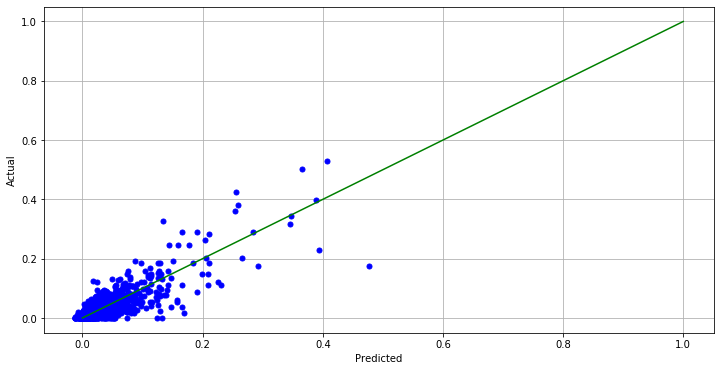

In [136]:
# Ploting predicted values of Wage against the actual values on the training data.

fig = plt.figure(figsize=(12, 6))
pl.plot(p, y_test,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.grid()
pl.show()

In [65]:
linreg = LinearRegression()

percentile2 = range(5, 101, 5)
results2 = []
print("Value:\n")
for i in percentile2:
    feature_select = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x2_train_feature_select = feature_select.fit_transform(x2_train, y2_train)
    scores = cross_val_score(linreg, x2_train_feature_select, y2_train, cv=5)
    print(i , scores.mean())
    results2 = np.append(results2, scores.mean())
    
optimal_percentile_ind = np.where(results == results.max())[0][0]
print('\n')
print("Optimal Percintile:",optimal_percentile_ind)

optimal_percentile_index = np.where(results == results.max())[0][0]
print("Optimal percentile of features:",percentile2[optimal_percentile_index])
optimal_num_features = int(percentile2[optimal_percentile_index]*len(fd.columns)/100)
print("Number of optimal features:",optimal_num_features)

Value:

5 0.752671743772729
10 0.788876966600814
15 0.7890494177609846
20 0.7890849053482002
25 0.7893220232256233
30 0.7900728548154446
35 0.7917338386992362
40 0.791691319076529
45 0.7918050856956793
50 0.7919749731272022
55 0.7921822880898708
60 0.7925786819916077
65 0.7927945574323939
70 0.7954454272928437
75 0.7958887440692204
80 0.7960129409828733
85 0.7968256251104163
90 0.7968543017083858
95 0.7967317462921448
100 0.796948804961471


Optimal Percintile: 10
Optimal percentile of features: 55
Number of optimal features: 32


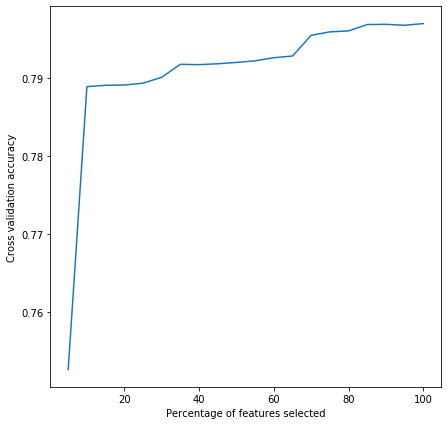

In [66]:
# Grapg of percentile of features VS. cross-validation scores

import pylab as pl
pl.rcParams["figure.figsize"] = (7,7)
pl.figure()

pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentile2,results2)

In [67]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=optimal_percentile_ind)
x2_train_fs = fs.fit_transform(x2_train, y2_train)
score = cross_val_score(linreg, x2_train_fs, y2_train, cv=5, scoring='neg_mean_absolute_error')
score = [abs(i) for i in scores]
linreg.fit(x2_train, y2_train)


print("Score:",score)
print("\n")
print("Cross-validation mean:",np.mean(score))

Score: [0.7792258115794557, 0.8075758473942998, 0.7444674944715542, 0.8229146142927612, 0.8305602570692845]


Cross-validation mean: 0.796948804961471


In [68]:
# Computing errors on all test instances Value
p = linreg.predict(x2_test)

# Printing MAE RMSE and r2 score.
print('MAE Value:', metrics.mean_absolute_error(y2_test,p ))
print('RMSE Value:', np.sqrt(metrics.mean_squared_error(y2_test, p)))
print('R2_Score Value: ', metrics.r2_score(y2_test, p))

MAE Value: 0.010981742627066152
RMSE Value: 0.020959233144114745
R2_Score Value:  0.7731482527293051


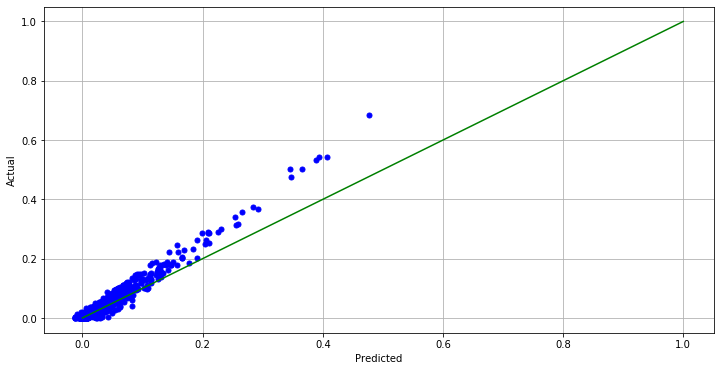

In [135]:
# Ploting predicted values of Value against the actual values on the training data. 

fig = plt.figure(figsize=(12, 6))
pl.plot(p, y2_test,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.grid()
pl.show()

## Ridge Regression


In [71]:
def calculate_params(m, n, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(m)
    y = np.array(n)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name,param_value,train_scores[i])

    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores




### Applying Ridge regression with target Wage.

Wage:

alpha 0.01 0.7673129836211817
alpha 0.41795918367346935 0.7670053534105155
alpha 0.8259183673469387 0.7661965133876055
alpha 1.233877551020408 0.7649916982994716
alpha 1.6418367346938774 0.7634749757722947
alpha 2.0497959183673466 0.7617138270983946
alpha 2.457755102040816 0.7597626456310236
alpha 2.865714285714285 0.7576654310761406
alpha 3.2736734693877545 0.7554578806819573
alpha 3.681632653061224 0.7531690240498679
alpha 4.0895918367346935 0.7508225097308162
alpha 4.497551020408163 0.7484376240815591
alpha 4.905510204081632 0.7460301027707211
alpha 5.313469387755101 0.7436127806186634
alpha 5.721428571428571 0.741196114592259
alpha 6.12938775510204 0.7387886066846678
alpha 6.537346938775509 0.736397147336681
alpha 6.9453061224489785 0.7340272954634162
alpha 7.353265306122448 0.7316835076529525
alpha 7.761224489795917 0.7293693264229613
alpha 8.169183673469387 0.72708753535404
alpha 8.577142857142857 0.7248402873145847
alpha 8.985102040816326 0.7226292107407661
alpha 9.393061

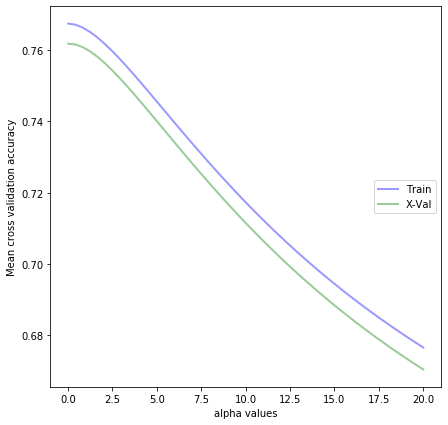

In [72]:
# Ridge

print('Wage:\n')
alpha = np.linspace(.01,20,50)
ridge = Ridge(alpha=alpha)

train_scores, test_scores = calculate_params(x_train, y_train, ridge, alpha, 'alpha', 10)


In [75]:
print(np.argmax(train_scores))
print(np.argmax(test_scores))


# Creating linear regression with best ridge coefficient
ridge = Ridge(alpha=0.01)

# Training model using the train  data-set
ridge.fit(x_train,y_train)


# Computing RMSE 
p = ridge.predict(x_test)
error = p-y_test
tot_error = np.dot(error,error)
RMSE_test = np.sqrt(tot_error/len(p))

print('RMSE of test Dataset Wage:',RMSE_test)

0
0
RMSE of test Dataset Wage: 0.018316263214502866


### Applying Ridge regression with target Value.

Value:

alpha 0.01 0.8000509887132221
alpha 0.41795918367346935 0.7996792584449147
alpha 0.8259183673469387 0.798718884665
alpha 1.233877551020408 0.7973137863295598
alpha 1.6418367346938774 0.7955746198647168
alpha 2.0497959183673466 0.7935869716788448
alpha 2.457755102040816 0.7914173649249292
alpha 2.865714285714285 0.7891177107249926
alpha 3.2736734693877545 0.7867286389570246
alpha 3.681632653061224 0.7842820130080786
alpha 4.0895918367346935 0.7818028440828986
alpha 4.497551020408163 0.7793107594969515
alpha 4.905510204081632 0.7768211367432425
alpha 5.313469387755101 0.7743459850523243
alpha 5.721428571428571 0.7718946347312791
alpha 6.12938775510204 0.7694742791363731
alpha 6.537346938775509 0.7670904029201713
alpha 6.9453061224489785 0.7647471219728688
alpha 7.353265306122448 0.762447454400829
alpha 7.761224489795917 0.7601935373585788
alpha 8.169183673469387 0.7579868011537151
alpha 8.577142857142857 0.755828109477646
alpha 8.985102040816326 0.7537178726632303
alpha 9.3930612

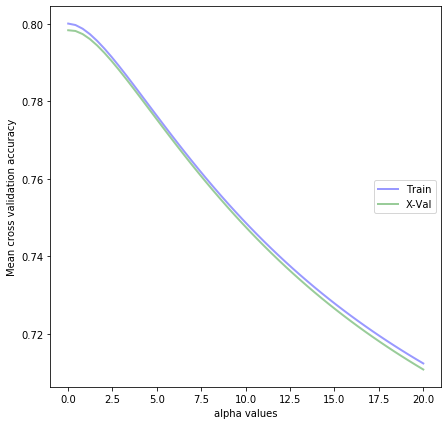

In [76]:
# Ridge
print('Value:\n')
alpha2 = np.linspace(.01,20,50)
ridge2 = Ridge(alpha=alpha)

train_scores2, test_scores2 = calculate_params(x2_train, y2_train, ridge2, alpha2, 'alpha', 10)

In [79]:
print(np.argmax(train_scores2))
print(np.argmax(test_scores2))


# Creating linear regression with best ridge coefficient
ridge = Ridge(alpha=0.01)

# Training model using the train  data-set
ridge.fit(x2_train,y2_train)


# Computing RMSE 
p = ridge.predict(x2_test)
error = p-y2_test
tot_error = np.dot(error,error)
RMSE_test = np.sqrt(tot_error/len(p))

print('RMSE of test Dataset Value:',RMSE_test)

0
0
RMSE of test Dataset Value: 0.020958944390156796


## Lasso Regression

### Applying Lasso regression with target Wage.

alpha 0.0001 0.7599672027622576
alpha 0.0009142857142857143 0.5452352291358791
alpha 0.0017285714285714285 0.534279687493879
alpha 0.0025428571428571423 0.5171675430769104
alpha 0.0033571428571428567 0.49394839242011973
alpha 0.004171428571428572 0.4644522946518224
alpha 0.004985714285714285 0.4288969377152436
alpha 0.0058 0.3871424334204718
alpha 0.006614285714285714 0.3594526808151648
alpha 0.0074285714285714285 0.35848458952225837
alpha 0.008242857142857142 0.3576517353870222
alpha 0.009057142857142856 0.3569624885482503
alpha 0.00987142857142857 0.35623998274195035
alpha 0.010685714285714284 0.3554570140012272
alpha 0.011499999999999998 0.35461445657189233
alpha 0.012314285714285713 0.353709089457679
alpha 0.013128571428571427 0.352740859190677
alpha 0.01394285714285714 0.3517096959478231
alpha 0.014757142857142856 0.3506192003850138
alpha 0.01557142857142857 0.34947297388834764
alpha 0.016385714285714285 0.348288280663014
alpha 0.017199999999999997 0.3470771519646102
alpha 0.01801

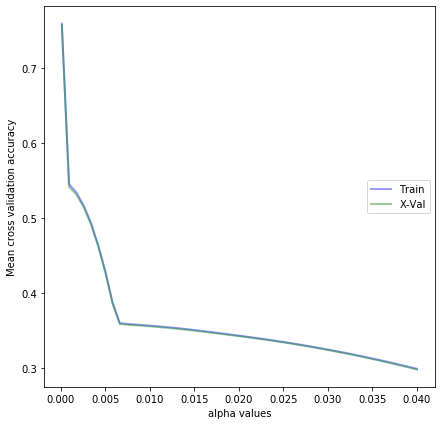

In [80]:
# Lasso Wage
alpha = np.linspace(.0001,.04,50)
lasso = Lasso(alpha=alpha)

train_scores, test_scores = calculate_params(x_train, y_train, lasso, alpha, 'alpha', 10)

In [81]:
print(np.argmax(train_scores))
print(np.argmax(test_scores))


# Creating linear regression with best ridge coefficient
lasso = Lasso(alpha=test_scores[0])

# Training model using the train  data-set
lasso.fit(x_train,y_train)


# Computing RMSE 
p = lasso.predict(x_test)
error = p-y_test
tot_error = np.dot(error,error)
RMSE_test = np.sqrt(tot_error/len(p))

print('RMSE of test Dataset Wage: ',RMSE_test)





0
0
RMSE of test Dataset Wage:  0.030896800483484692


### Applying Lasso regression with target Value.

alpha 0.0001 0.7952627607468553
alpha 0.0009142857142857143 0.6131844950429034
alpha 0.0017285714285714285 0.605096474724266
alpha 0.0025428571428571423 0.5922503917581552
alpha 0.0033571428571428567 0.5747846563636462
alpha 0.004171428571428572 0.55314257575797
alpha 0.004985714285714285 0.5271793263229803
alpha 0.0058 0.4972502620402399
alpha 0.006614285714285714 0.4656615787318484
alpha 0.0074285714285714285 0.4623183886848866
alpha 0.008242857142857142 0.46145659542061246
alpha 0.009057142857142856 0.4607025756973283
alpha 0.00987142857142857 0.4599136006374465
alpha 0.010685714285714284 0.4589771985156214
alpha 0.011499999999999998 0.45801357908145784
alpha 0.012314285714285713 0.4571827347067884
alpha 0.013128571428571427 0.45634125349065585
alpha 0.01394285714285714 0.4554732359533767
alpha 0.014757142857142856 0.4546014510137558
alpha 0.01557142857142857 0.4537742673556859
alpha 0.016385714285714285 0.4529030852410433
alpha 0.017199999999999997 0.451982615512475
alpha 0.0180142

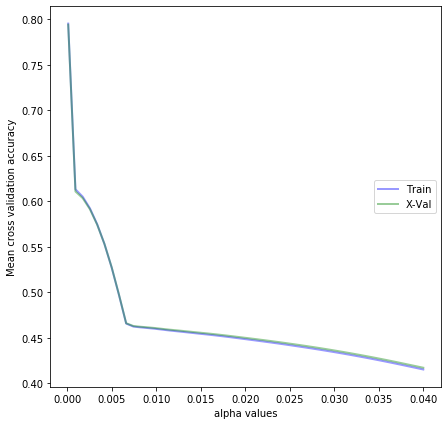

In [82]:
# Lasso on Value
alpha2 = np.linspace(.0001,.04,50)
lasso2 = Lasso(alpha=alpha)

train_scores2, test_scores2 = calculate_params(x2_train, y2_train, lasso2, alpha2, 'alpha', 10)

In [83]:
print(np.argmax(train_scores2))
print(np.argmax(test_scores2))


# Creating linear regression with best ridge coefficient
lasso = Lasso(alpha=test_scores[0])

# Training model using the train  data-set
lasso.fit(x2_train,y2_train)


# Computing RMSE 
p = lasso.predict(x2_test)
error = p-y2_test
tot_error = np.dot(error,error)
RMSE_test = np.sqrt(tot_error/len(p))

print('RMSE of test Dataset Value:',RMSE_test)


0
0
RMSE of test Dataset Value: 0.03812344735219243


## Stochastic Gradient Descent for regression

### First applying SGD to target Wage. 

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


scaler = StandardScaler()
scaler.fit(x_train)
x_train_sgd = scaler.transform(x_train)

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(.0001, 1, 100),
}

grid_search = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)
grid_search.fit(x_train_sgd, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   24.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_star...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-0

{'alpha': 0.0304, 'penalty': 'l2'} 0.7931069614628482

RMSE mean test of SGD: 0.018650141717835807


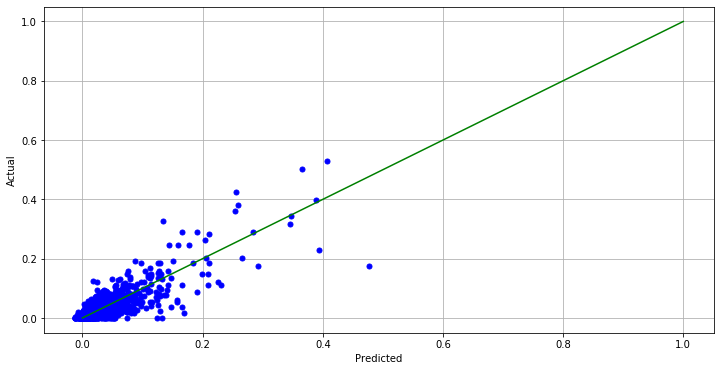

In [134]:
params = grid_search.best_params_
print(params, grid_search.best_score_)


sgdreg = SGDRegressor(penalty=params["penalty"], alpha=params["alpha"])
sgdreg.fit(x_train_sgd,y_train)

scaler.fit(x_test)
x_test_sgd = scaler.transform(x_test)

# Computing RMSE 
p = sgdreg.predict(x_test_sgd)
error = p-y_test
tot_error = np.dot(error,error)
RMSE_test = np.sqrt(tot_error/len(p))
print("\nRMSE mean test of SGD:",np.mean(RMSE_test))

fig = plt.figure(figsize=(12, 6))
pl.plot(p, y_test,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.grid()
pl.show()

l1_ratio 0.0 0.75843613915387
l1_ratio 0.010101010101010102 0.7499007313420061
l1_ratio 0.020202020202020204 0.751666493236669
l1_ratio 0.030303030303030304 0.7553591840950242
l1_ratio 0.04040404040404041 0.7602791791242205
l1_ratio 0.05050505050505051 0.7516368183916788
l1_ratio 0.06060606060606061 0.7569104895790766
l1_ratio 0.07070707070707072 0.7579116208080271
l1_ratio 0.08080808080808081 0.7588410721959953
l1_ratio 0.09090909090909091 0.7527245771824332
l1_ratio 0.10101010101010102 0.7617988338087736
l1_ratio 0.11111111111111112 0.7595732988630142
l1_ratio 0.12121212121212122 0.7581746076515609
l1_ratio 0.13131313131313133 0.7512671808033425
l1_ratio 0.14141414141414144 0.7585678378614926
l1_ratio 0.15151515151515152 0.7588874604835373
l1_ratio 0.16161616161616163 0.757188126393469
l1_ratio 0.17171717171717174 0.7560809455419383
l1_ratio 0.18181818181818182 0.7556460768379223
l1_ratio 0.19191919191919193 0.7616366003845398
l1_ratio 0.20202020202020204 0.7582853021473704
l1_ratio 

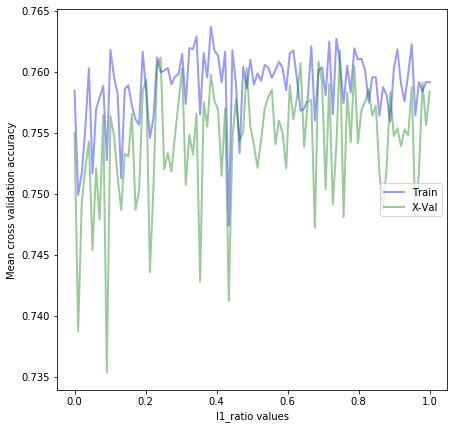

In [86]:
sgdreg = SGDRegressor(penalty='elasticnet')
l1_ratio = np.linspace(0, 1, 100)

train_scores, test_scores = calculate_params(x_train_sgd, y_train, sgdreg, l1_ratio, 'l1_ratio', 10)

0.7474747474747475

RMSE mean test on SGD: 0.019460845849482898


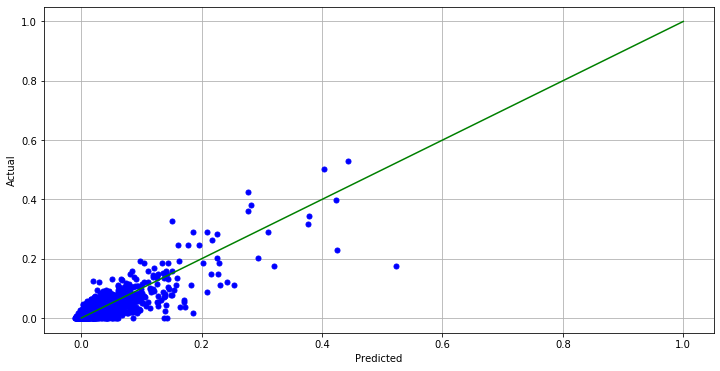

In [133]:
l1 = l1_ratio[np.argmax(test_scores)]
print(l1)


sgdreg = SGDRegressor(penalty="elasticnet", l1_ratio=l1)
sgdreg.fit(x_train_sgd,y_train)

scaler.fit(x_test)
x_test_sgd = scaler.transform(x_test)

# Computing RMSE
p = sgdreg.predict(x_test_sgd)
error = p-y_test
tot_error = np.dot(error,error)
RMSE_test = np.sqrt(tot_error/len(p))
print("\nRMSE mean test on SGD:",np.mean(RMSE_test))

fig = plt.figure(figsize=(12, 6))
pl.plot(p, y_test,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.grid()
pl.show()

### Applying SGD to target Value. 

In [88]:
scaler2 = StandardScaler()
scaler.fit(x2_train)
x2_train_sgd = scaler.transform(x2_train)

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(.0001, 1, 100),
}

grid_search = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)
grid_search.fit(x2_train_sgd, y2_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   16.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_star...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-0

{'alpha': 0.0304, 'penalty': 'l2'} 0.7931069614628482

RMSE mean test of SGD: 0.022108439618557116


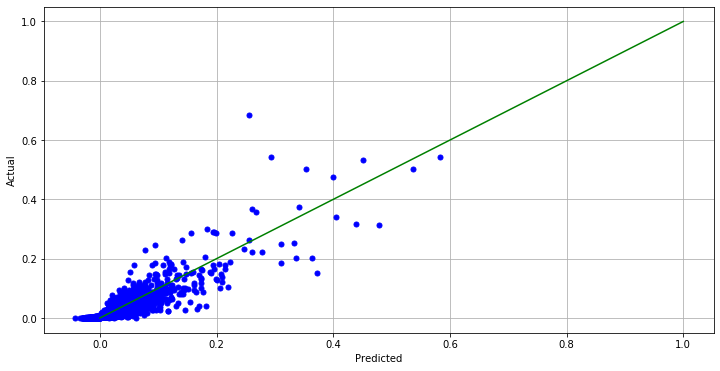

In [132]:
params = grid_search.best_params_
print(params, grid_search.best_score_)


sgdreg = SGDRegressor(penalty=params["penalty"], alpha=params["alpha"])
sgdreg.fit(x2_train_sgd,y2_train)

scaler.fit(x2_test)
x2_test_sgd = scaler.transform(x2_test)

# Computing RMSE 
p = sgdreg.predict(x2_test_sgd)
error = p-y2_test
tot_error = np.dot(error,error)
RMSE_test = np.sqrt(tot_error/len(p))
print("\nRMSE mean test of SGD:",np.mean(RMSE_test))


fig = plt.figure(figsize=(12, 6))
pl.plot(p, y2_test,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.grid()
pl.show()

l1_ratio 0.0 0.7939581762207613
l1_ratio 0.010101010101010102 0.7949303953334692
l1_ratio 0.020202020202020204 0.7967625749287267
l1_ratio 0.030303030303030304 0.7922440660601672
l1_ratio 0.04040404040404041 0.7938791272077955
l1_ratio 0.05050505050505051 0.7810186580314721
l1_ratio 0.06060606060606061 0.792541769563283
l1_ratio 0.07070707070707072 0.7943653231046804
l1_ratio 0.08080808080808081 0.794809063467269
l1_ratio 0.09090909090909091 0.7947300523203971
l1_ratio 0.10101010101010102 0.794949014872911
l1_ratio 0.11111111111111112 0.7939561209303833
l1_ratio 0.12121212121212122 0.7962896340286362
l1_ratio 0.13131313131313133 0.7939695954699598
l1_ratio 0.14141414141414144 0.7922740703041015
l1_ratio 0.15151515151515152 0.7966531413575645
l1_ratio 0.16161616161616163 0.7934391941243228
l1_ratio 0.17171717171717174 0.789988915801296
l1_ratio 0.18181818181818182 0.7931669335939884
l1_ratio 0.19191919191919193 0.794579479645858
l1_ratio 0.20202020202020204 0.7892666322189598
l1_ratio 0

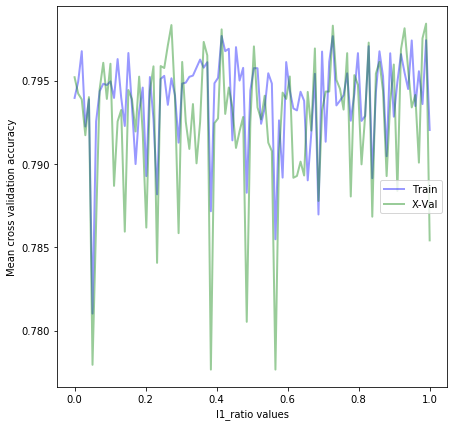

In [90]:
sgdreg2 = SGDRegressor(penalty='elasticnet')
l1_ratio2 = np.linspace(0, 1, 100)

train_scores2, test_scores2 = calculate_params(x2_train_sgd, y2_train, sgdreg2, l1_ratio2, 'l1_ratio', 10)

0.98989898989899

RMSE mean test on SGD: 0.02187948143844485


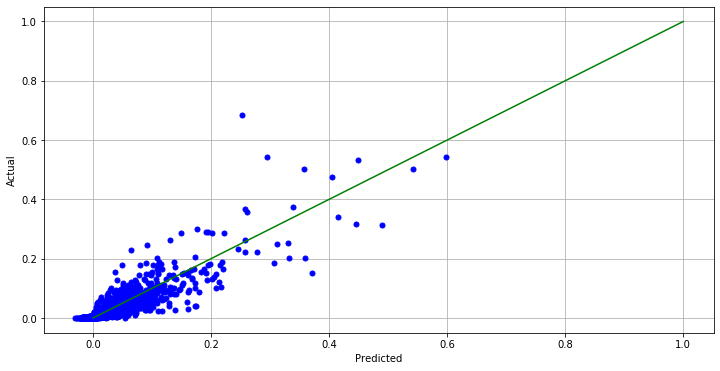

In [131]:
l1 = l1_ratio2[np.argmax(test_scores2)]
print(l1)


sgdreg = SGDRegressor(penalty="elasticnet", l1_ratio=l1)
sgdreg.fit(x2_train_sgd,y2_train)

scaler.fit(x2_test)
x2_test_sgd = scaler.transform(x2_test)

# Computing RMSE
p = sgdreg.predict(x2_test_sgd)
error = p-y2_test
tot_error = np.dot(error,error)
RMSE_test = np.sqrt(tot_error/len(p))
print("\nRMSE mean test on SGD:",np.mean(RMSE_test))

fig = plt.figure(figsize=(12, 6))
pl.plot(p, y2_test,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.grid()
pl.show()

## Support Vector Machine

### Applying SVM on dataset with target Wage.

In [92]:
svm = SVR(kernel='rbf')
svm.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [94]:
svm_pred = svm.predict(x_test)


In [109]:
print('SVM Performance on Wage:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm_pred))

SVM Performance on Wage:

all features, No scaling:
MAE: 0.04968500854152405
RMSE: 0.05311546352498705
R2_Score:  -1.2977899355003046


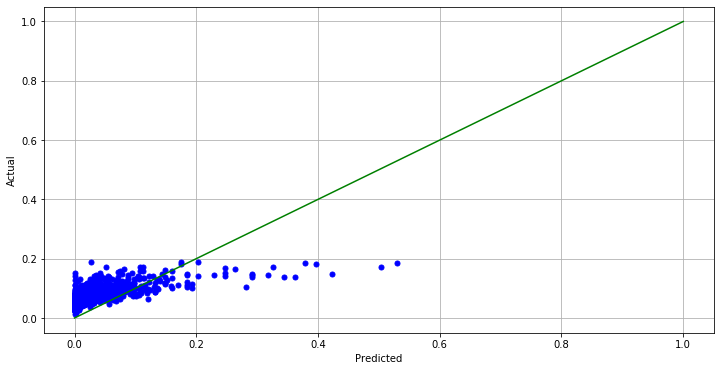

In [130]:
fig = plt.figure(figsize=(12, 6))
pl.plot( y_test,svm_pred,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.grid()
pl.show()

In [97]:
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)


In [98]:
grid.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-4.133, total=   4.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-4.188, total=   4.7s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-6.020, total=   4.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-4.479, total=   4.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-3.735, total=   4.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-3.880, total=   2.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-3.944, total=   2.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-5.731, total=   2.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-4.202, total=   2.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [99]:
grid.best_params_


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [100]:
grid.best_estimator_


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [101]:
grid_predictions = grid.predict(x_test)


RMSE: 0.061370412893764215
R2_Score:  -2.067513350953087


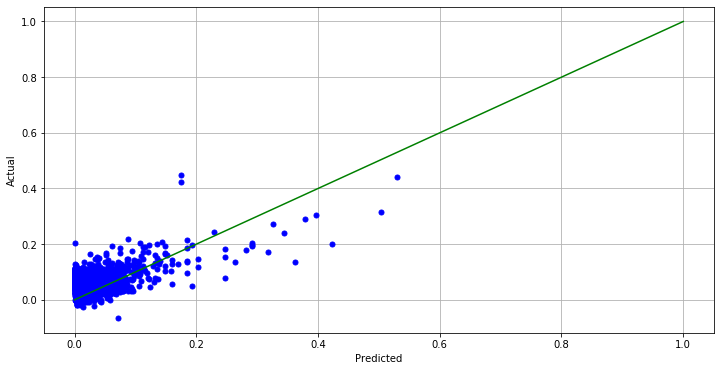

In [129]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, grid_predictions))

fig = plt.figure(figsize=(12, 6))
pl.plot( y_test,grid_predictions,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.grid()
pl.show()

### Applying SVM on dataset with target Wage.

In [103]:
svm2 = SVR(kernel='rbf')
svm2.fit(x2_train,y2_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [105]:
svm2_pred = svm2.predict(x2_test)


In [108]:
print('SVM Performance on Value:')

print('\nall features, No scaling:')
print('MAE Value:', metrics.mean_absolute_error(y_test, svm_pred))
print('RMSE value:', np.sqrt(metrics.mean_squared_error(y_test, svm_pred)))
print('R2_Score value : ', metrics.r2_score(y_test, svm_pred))

SVM Performance on Value:

all features, No scaling:
MAE Value: 0.04968500854152405
RMSE value: 0.05311546352498705
R2_Score value :  -1.2977899355003046


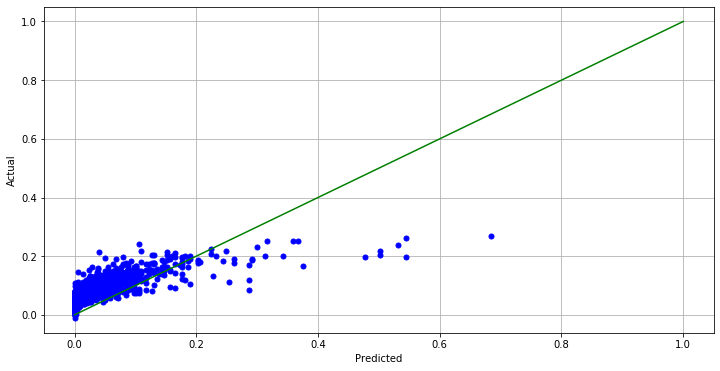

In [128]:
fig = plt.figure(figsize=(12, 6))
pl.plot( y2_test,svm2_pred,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.grid()
pl.show()

In [116]:
param_grid2 = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid2,refit=True,verbose=3)


In [112]:
grid.fit(x2_train,y2_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-2.417, total=   4.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-3.075, total=   5.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-3.493, total=   5.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-3.187, total=   5.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-2.772, total=   5.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-2.176, total=   1.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-2.767, total=   1.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-3.146, total=   1.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-2.827, total=   1.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [113]:
grid.best_params_


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [114]:
grid.best_estimator_


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [115]:
grid_predictions2 = grid.predict(x2_test)


RMSE Value: 0.06368405513264273
R2_Score value:  -1.0943669247786714


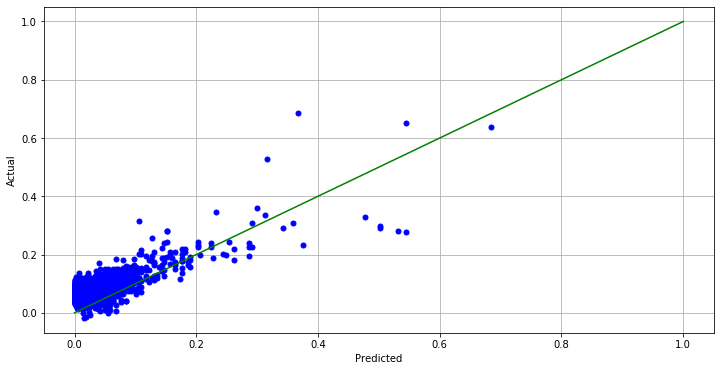

In [127]:
print('RMSE Value:', np.sqrt(metrics.mean_squared_error(y2_test, grid_predictions2)))
print('R2_Score value: ', metrics.r2_score(y2_test, grid_predictions2))

fig = plt.figure(figsize=(12, 6))
pl.plot( y2_test,grid_predictions2,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.grid()
pl.show()

## Random Forest

###### Applying RF on dataset with target Wage..

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf = RandomForestRegressor(random_state=101, n_estimators=200)
rf.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [119]:
rf_pred = rf.predict(x_test)


Random Forest Performance:

all features, No scaling:
MAE: 0.008056370081778765
RMSE: 0.017365496560278318
R2_Score:  0.7543918443335345


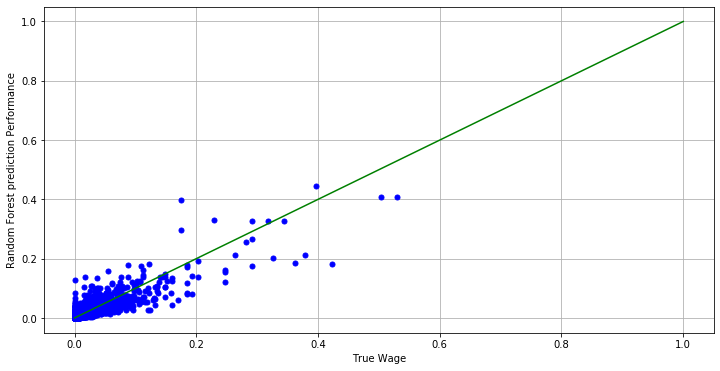

In [120]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf_pred))


fig = plt.figure(figsize=(12, 6))
pl.plot( y_test,rf_pred,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('True Wage')
pl.ylabel('Random Forest prediction Performance')
pl.grid()
pl.show()

### Applying RF on dataset with target Value.

In [122]:
rf2 = RandomForestRegressor(random_state=101, n_estimators=200)
rf2.fit(x2_train, y2_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [123]:
rf2_pred = rf2.predict(x2_test)


Random Forest Performance:

all features, No scaling:
MAE: 0.002078071329701827
RMSE: 0.00786133814586774
R2_Score:  0.9680857747455051


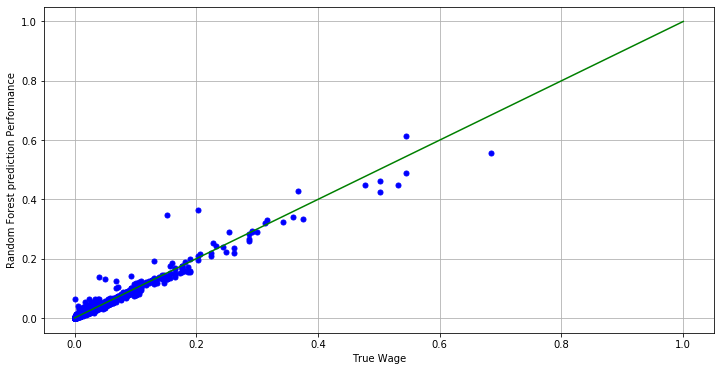

In [124]:
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rf2_pred))


fig = plt.figure(figsize=(12, 6))
pl.plot( y2_test,rf2_pred,'bo', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('True Wage')
pl.ylabel('Random Forest prediction Performance')
pl.grid()
pl.show()

## Final Verdict